## House Price Prediction

## Assignment - PART I

### Data Understanding

In [148]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [149]:
# Read the input file
data = pd.read_csv(r'train.csv')

In [150]:
# Check the number of rows and columns in the data
data.shape

(1460, 81)

In [151]:
# Check the column names in the data
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Cleaning

In [152]:
# Check the number of missing values in all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [153]:
# Checking percentage of missing data
missing_percentage = pd.DataFrame(data.isna().sum()*100/len(data), columns = ['percentage of missing data'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.sort_values(by ='percentage of missing data',ascending=False).head(20)

,index,percentage of missing data
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945


### Let's start imputing these columns with the suitable value using the data dictionary

In [154]:
# In 'PoolQC' field, 'NA' means the house doesn't have any pool
data['PoolQC'] = data['PoolQC'].fillna('No_Pool')

In [155]:
# In 'MiscFeature' field, 'NA' means None and that the house doesn't have any miscellaneous features not covered in other categories
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [156]:
# In 'Alley' field, 'NA' means the house has no alley access
data['Alley'] = data['Alley'].fillna('No_Alley_Access')

In [157]:
# In 'Fence' field, 'NA' means the house has no fence
data['Fence'] = data['Fence'].fillna('No_Fence')

In [158]:
# In 'FireplaceQu' field, 'NA' means the house has no fireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('No_Fireplace')

In [159]:
# In 'GarageYrBlt' field, 'NA' means the house has no garage
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

#changing data type of Gararge yr built to int from float
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

In [160]:
# For all 4 fields related to Garage, 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond', 'NA' means no garage
garage_columns_list = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns_list:
    data[col] = data[col].fillna('No_Garage')

In [161]:
# For all 5 fields related to basement, 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond', 'NA' means no basement
basement_columns_list = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for col in basement_columns_list:
    data[col] = data[col].fillna('No_Basement')

In [162]:
# In 'MasVnrType' field, 'NA' means none
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [163]:
# In 'Electrical' there is no description for 'NA' in the data dictionary. So we can impute with mode ('SBrkr')
data['Electrical'] = data['Electrical'].fillna('SBrkr')

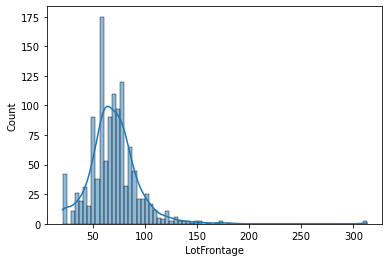

In [164]:
# 'LotFrontage' is a numerical value which tells about Linear feet of street connected to property
# Let's check the mean and median and impute the missing values

sns.histplot(x='LotFrontage', data=data, kde=True)
plt.show()

#### We observe that the distribution of 'LotFrontage' is normal and not skewed. So we can impute the missing values with mean

In [165]:
# Checking the mean and median of 'LotFrontage'
print("Mean of LotFrontage = : ", data['LotFrontage'].mean())
print("Median of LotFrontage = : ", data['LotFrontage'].median())

# Impute the missing values with mean
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

Mean of LotFrontage = :  70.04995836802665
Median of LotFrontage = :  69.0


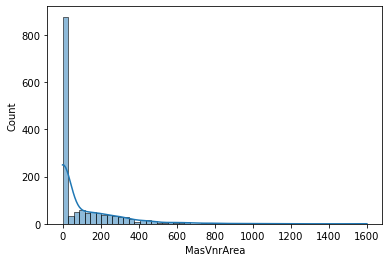

In [166]:
# 'MasVnrArea' is a numerical value which tells about Masonry veneer area in square feet
# Let's check the distribution of 'MasVnrArea' and then impute the missing values

sns.histplot(x='MasVnrArea', data=data, kde=True)
plt.show()

#### We observe that the distribution of 'MasVnrArea' is extremely positively skewed. For skewed distributions, median is a better choice for imputation as it is less sensitive to outliers than the mean

In [167]:
# Checking the mean and median of 'MasVnrArea'
print("Mean of MasVnrArea = : ", data['MasVnrArea'].mean())
print("Median of MasVnrArea = : ", data['MasVnrArea'].median())

# Impute the missing values with median
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

Mean of MasVnrArea = :  103.68526170798899
Median of MasVnrArea = :  0.0


In [168]:
# Changing months to categorical
import calendar
data['MonthSold'] = data['MoSold'].apply(lambda x: calendar.month_name[x])
data=data.drop(['MoSold'], axis=1)

In [169]:
# Converting binary variables to numeric by mapping to 0 and 1
data['Street'] = data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
data['CentralAir'] = data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [170]:
# Converting binary variables to numeric by mapping to 0 and 1
data['PavedDrive'] = data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

### Exploratory Data Analysis

In [171]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

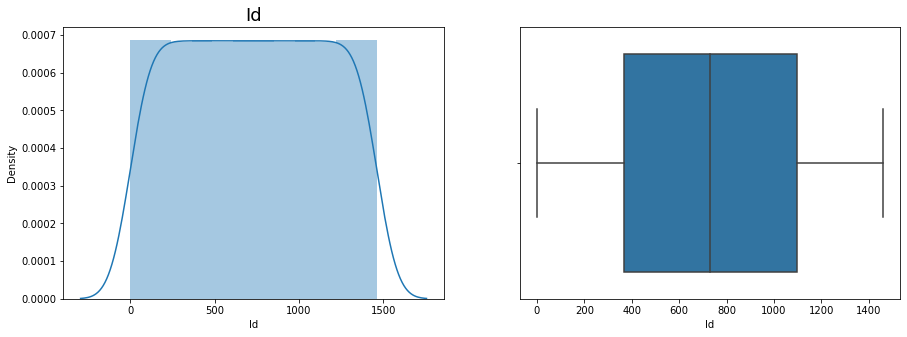

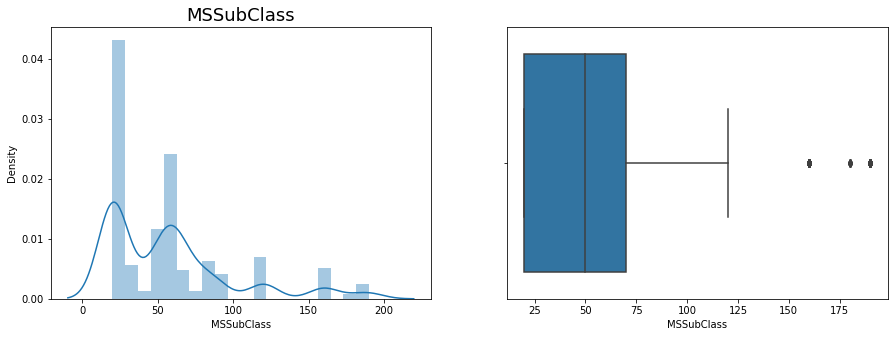

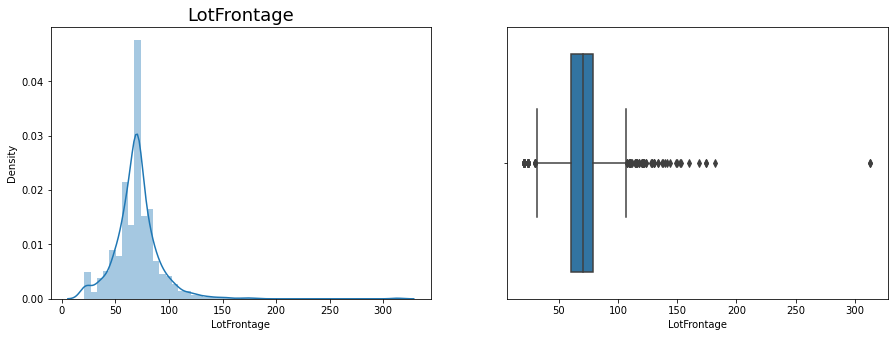

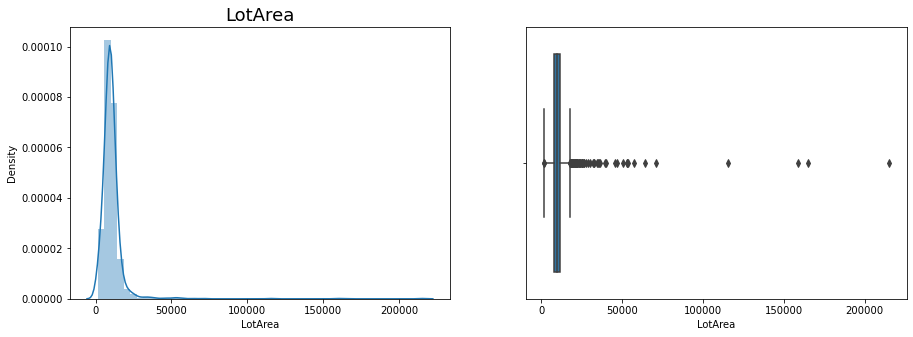

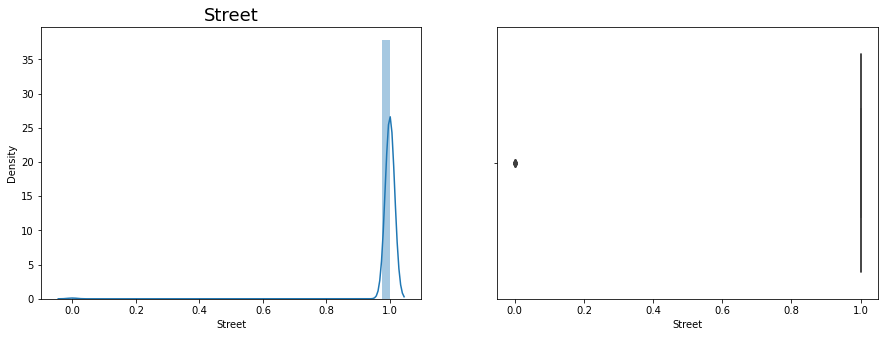

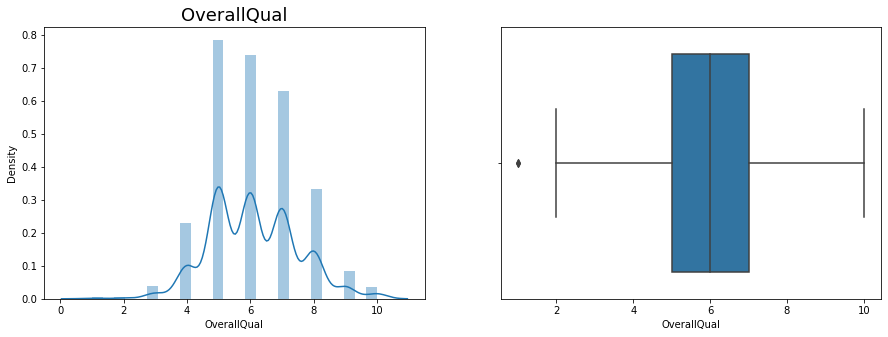

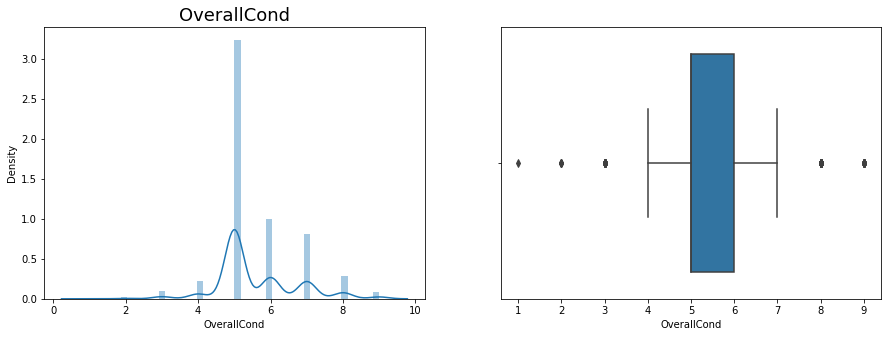

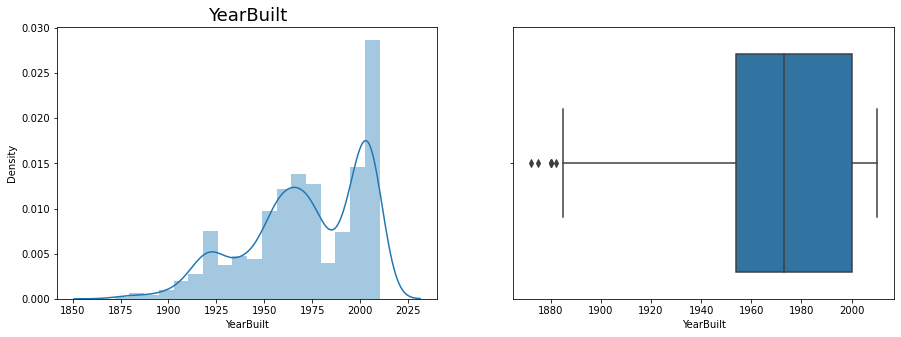

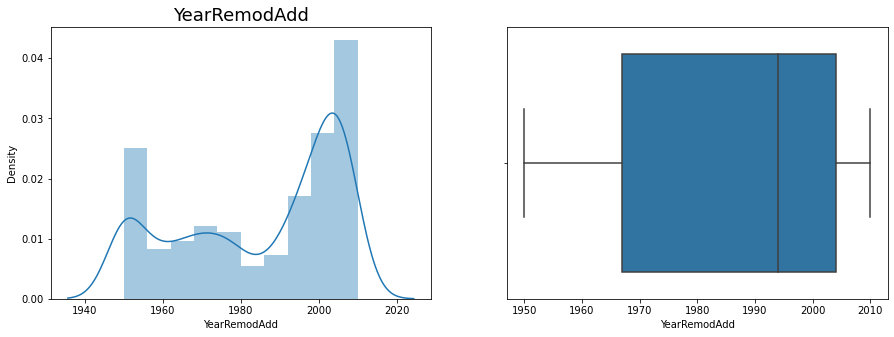

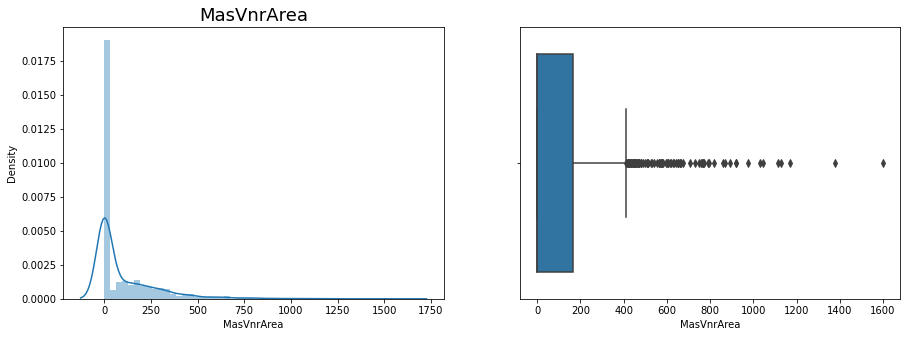

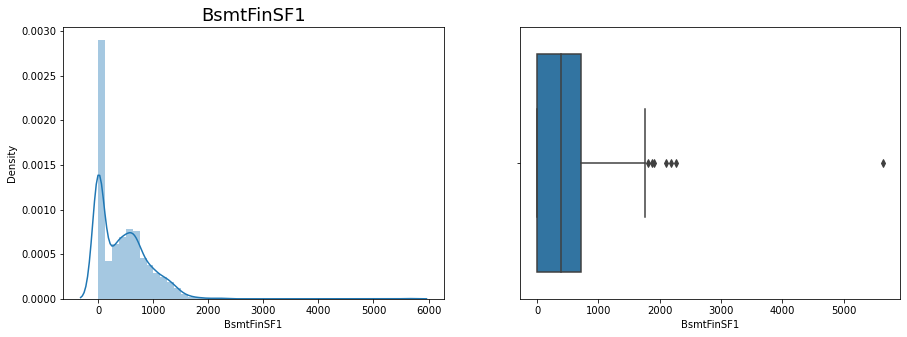

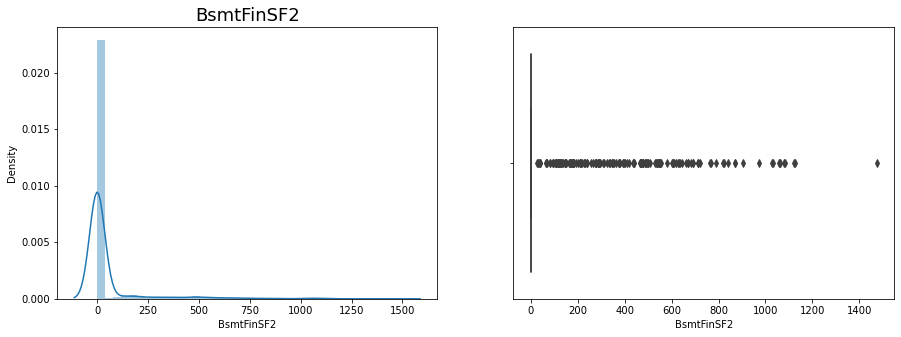

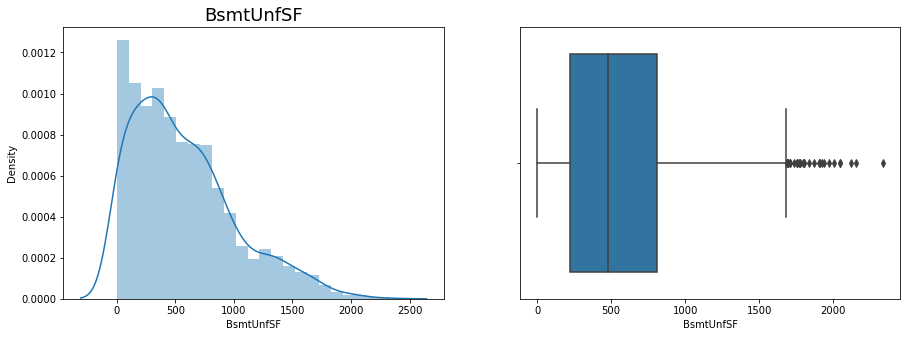

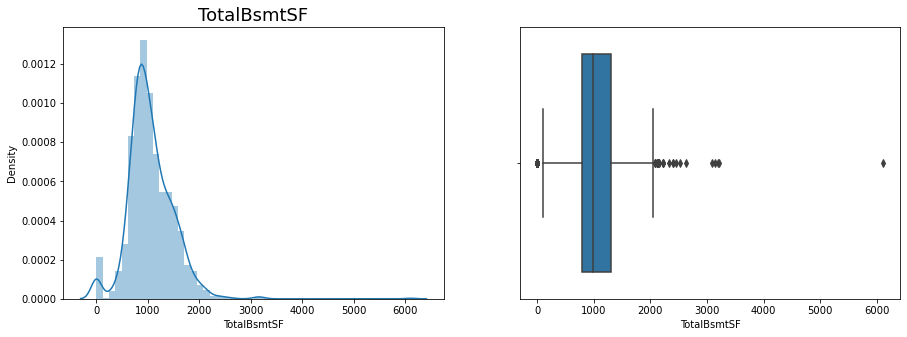

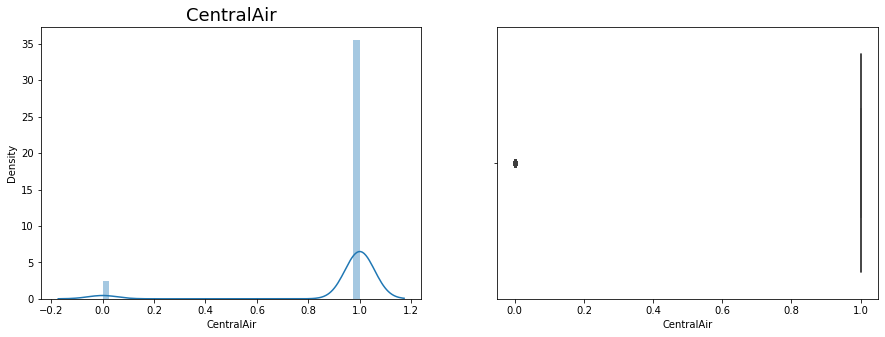

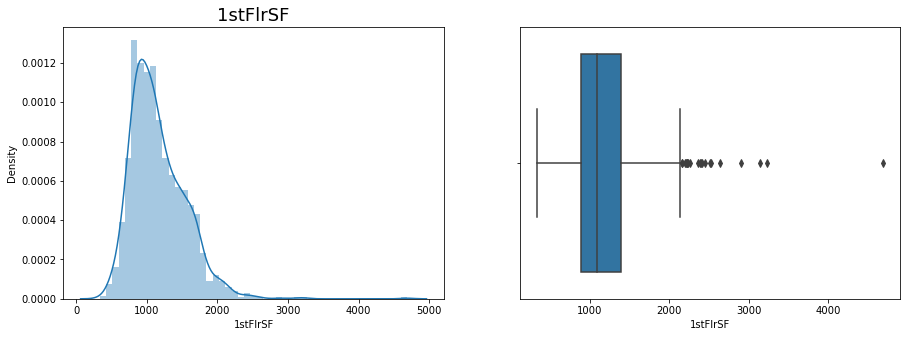

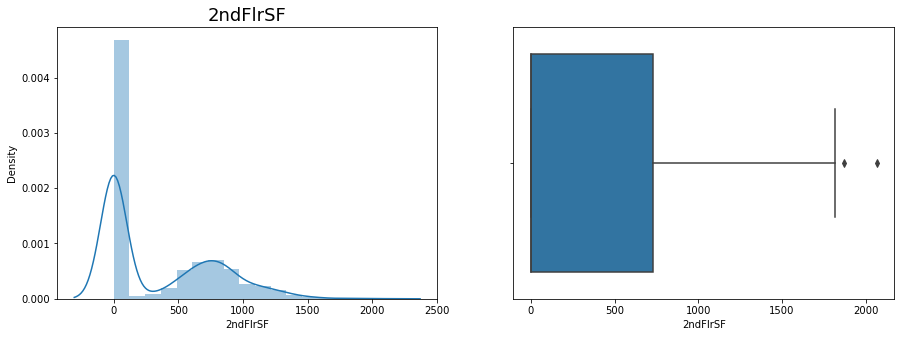

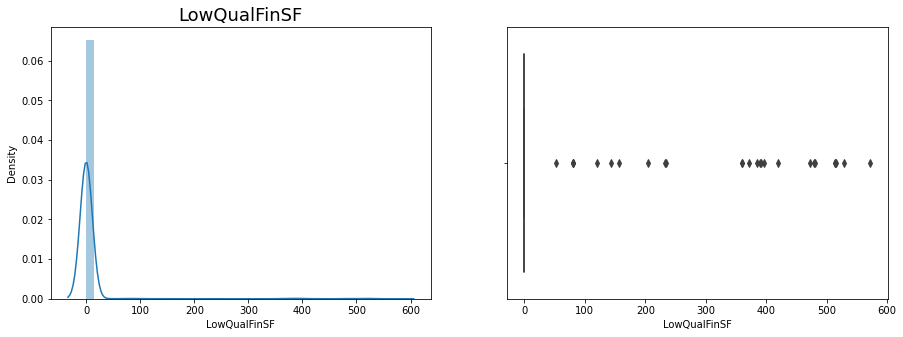

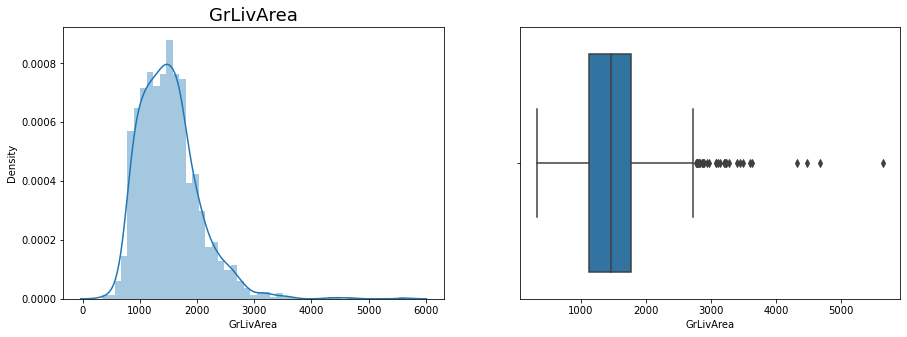

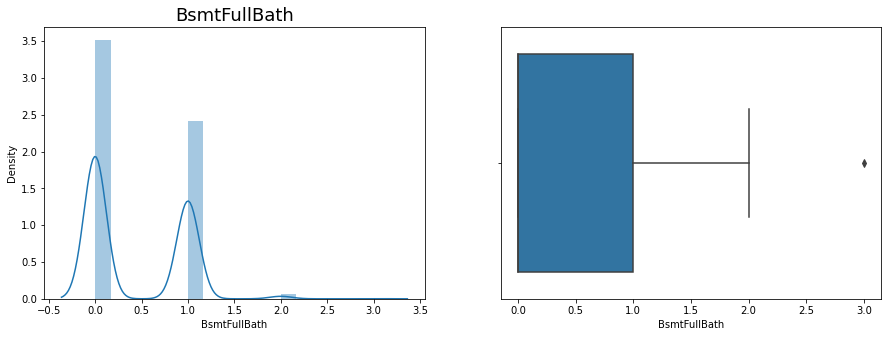

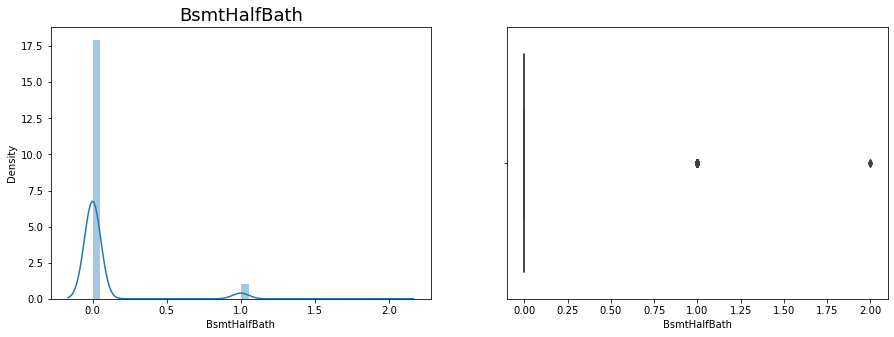

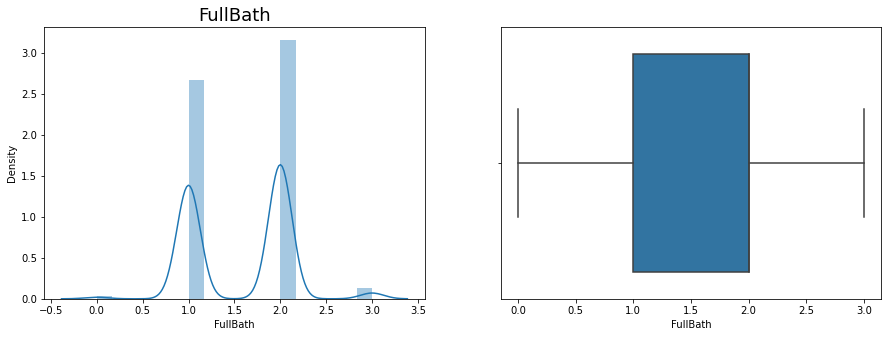

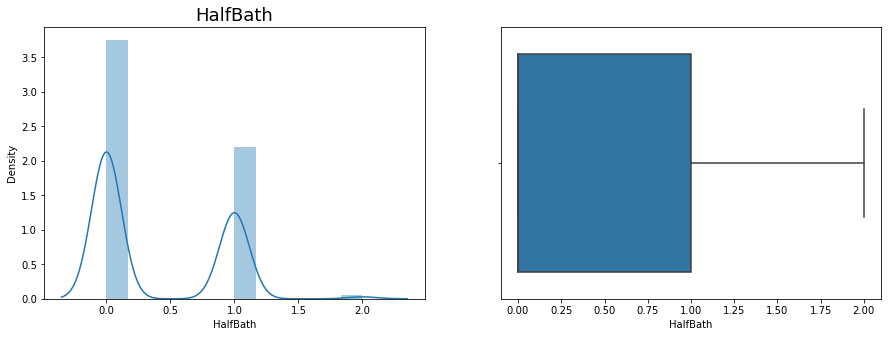

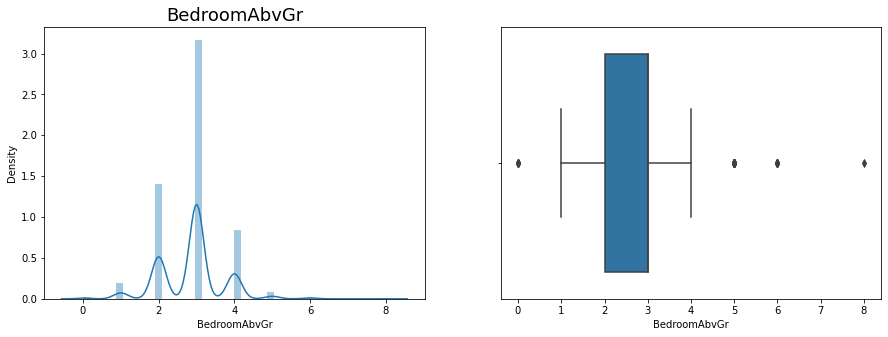

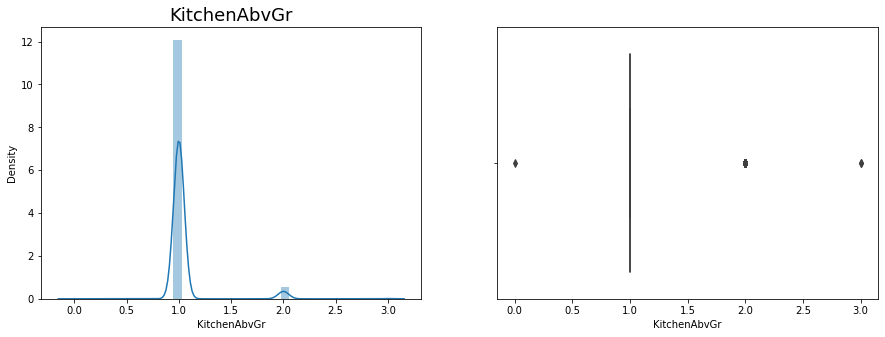

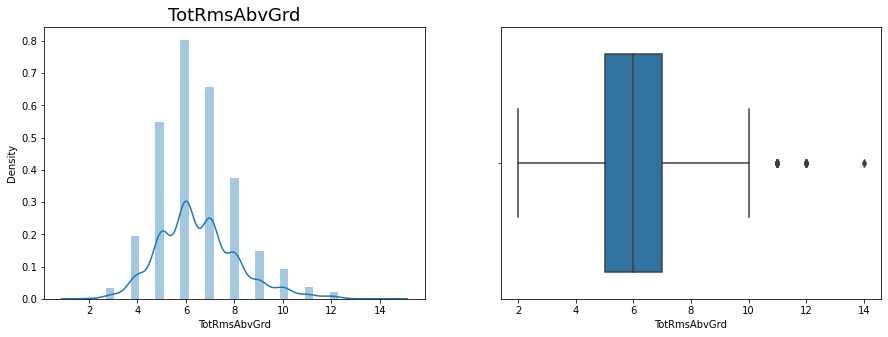

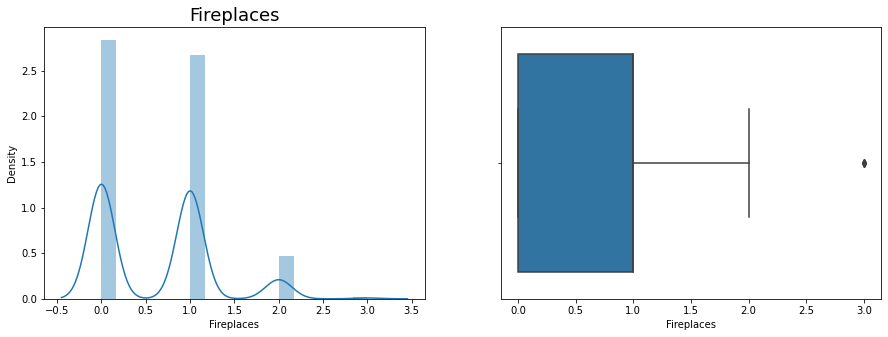

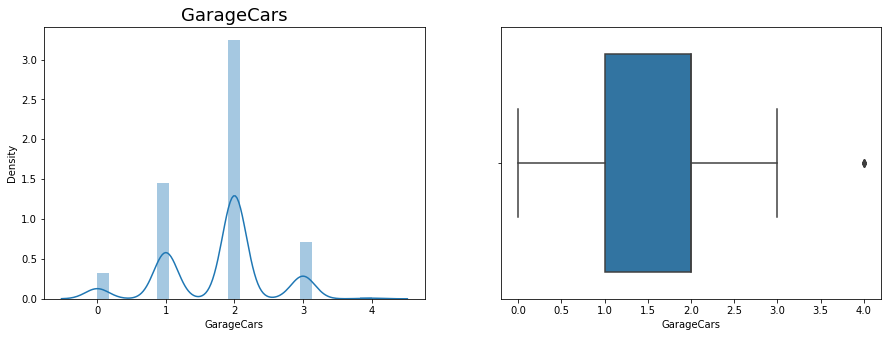

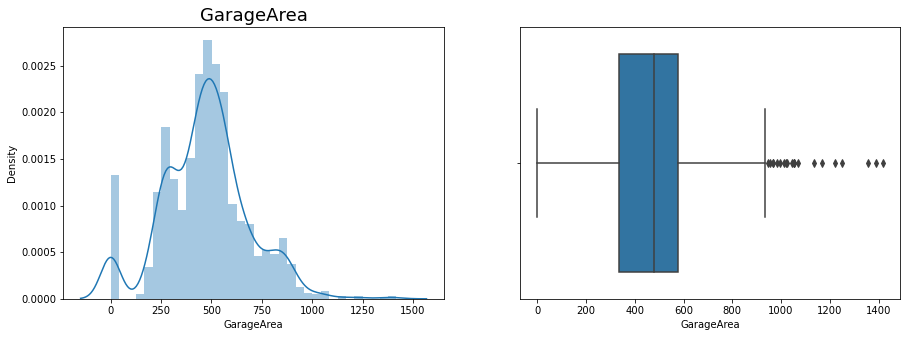

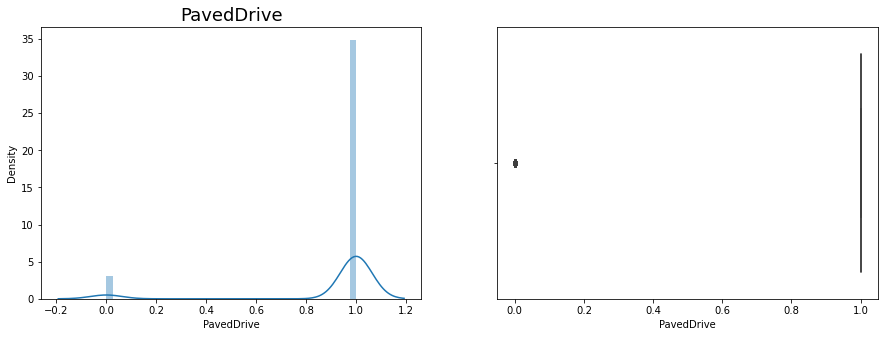

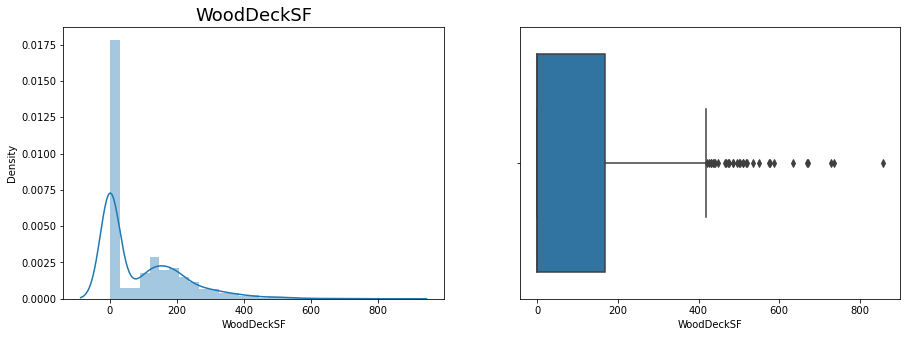

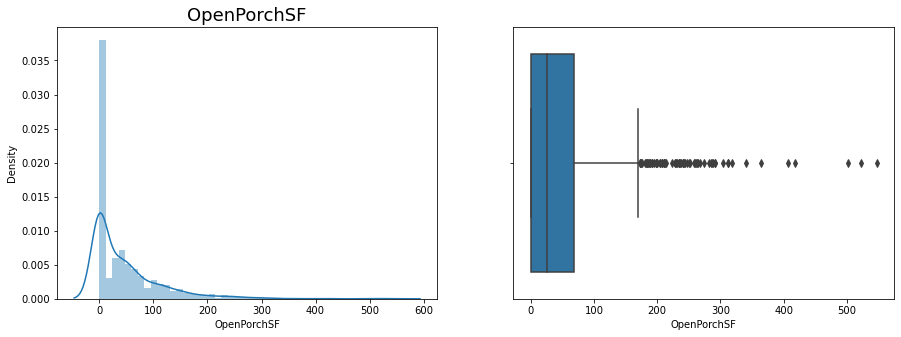

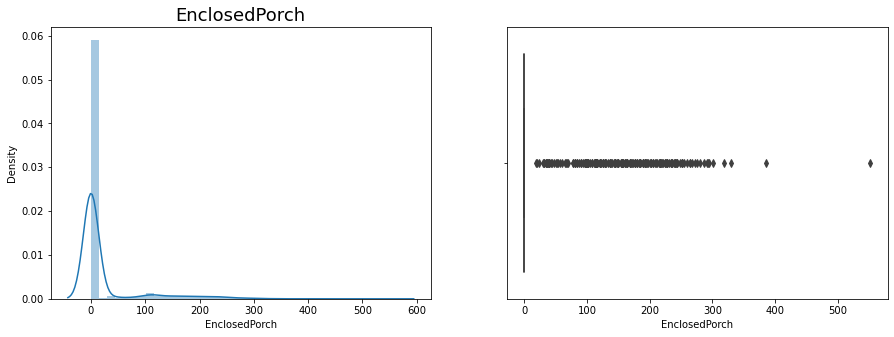

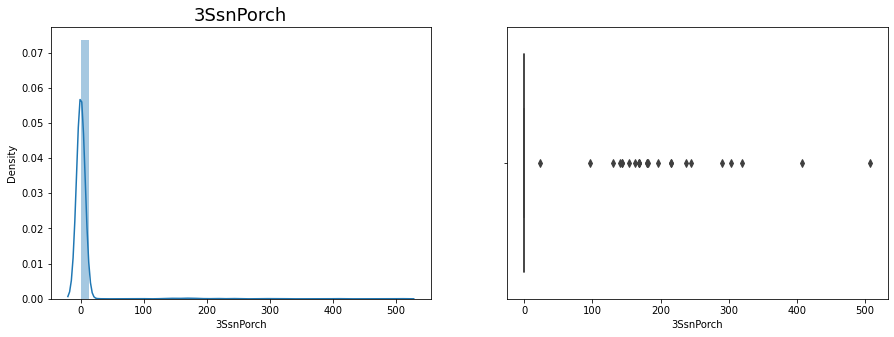

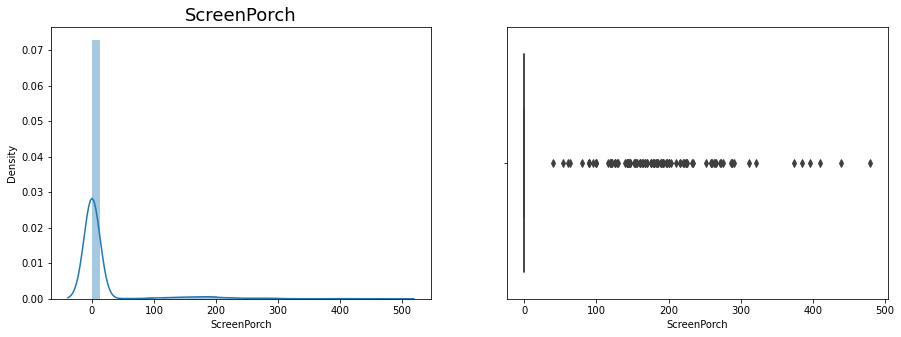

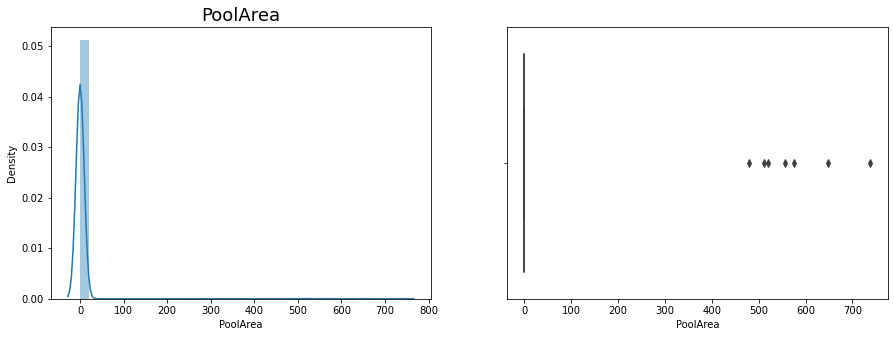

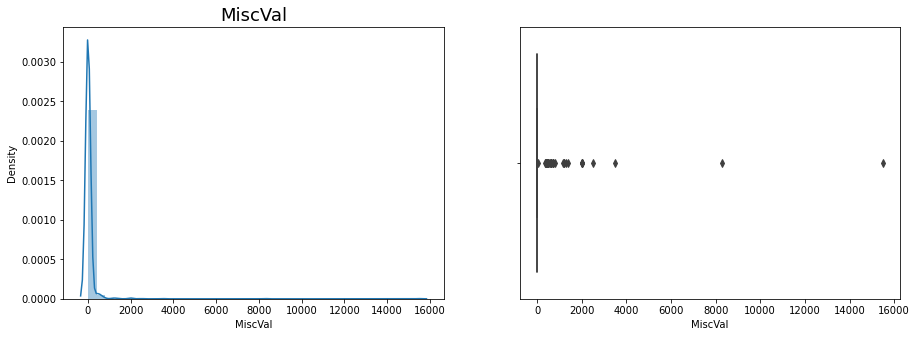

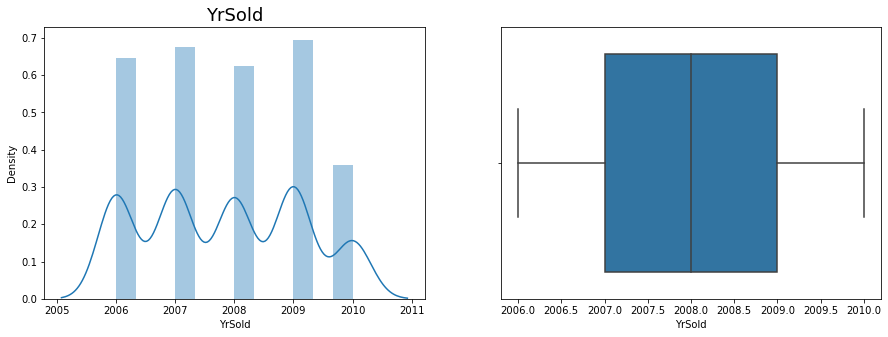

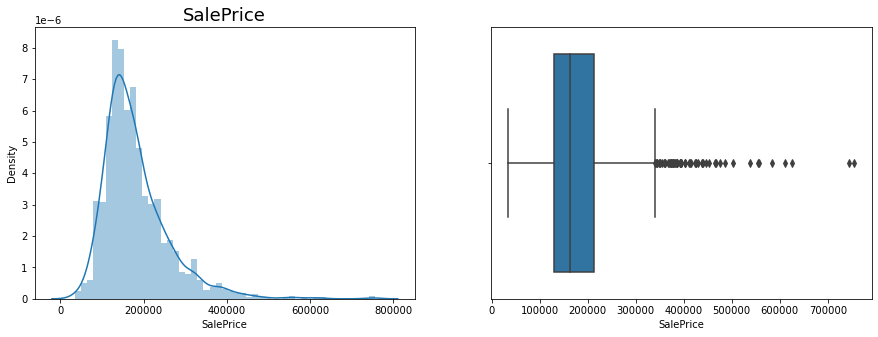

In [172]:
# Check the distribution of all numeric variables using histograms and boxplots

# Select numerical variables using the data type
data_num = data.select_dtypes(include=['int64', 'float64'])

for col in data_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(data_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(data_num[col])
    plt.show() 

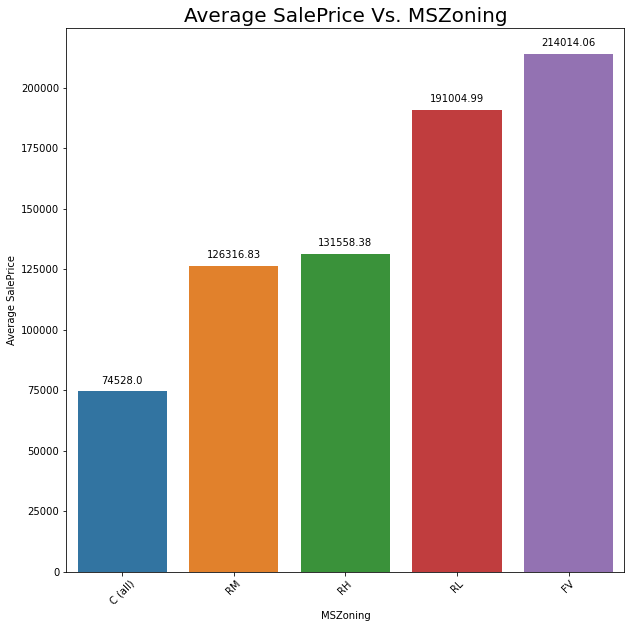

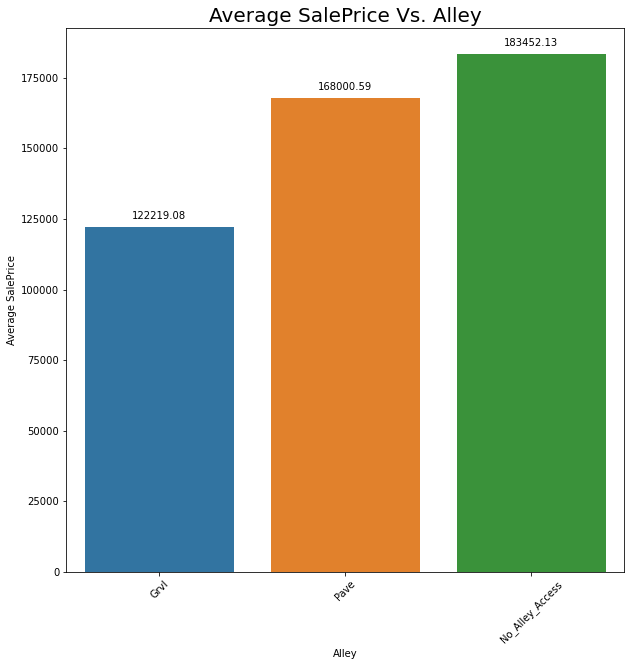

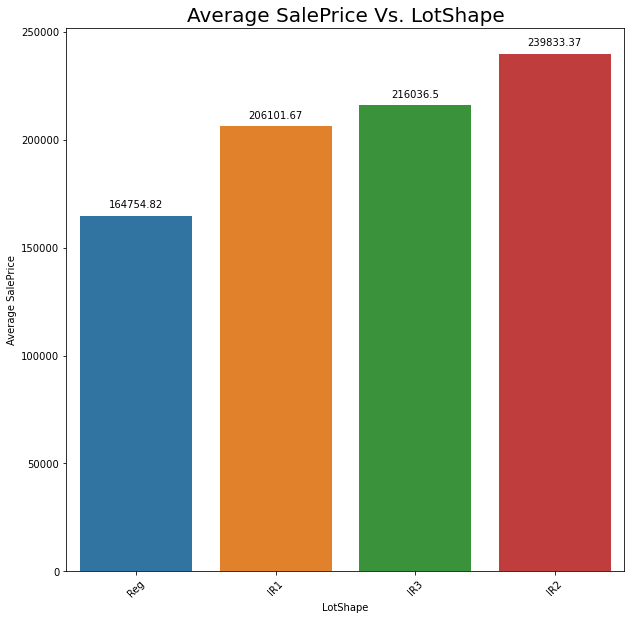

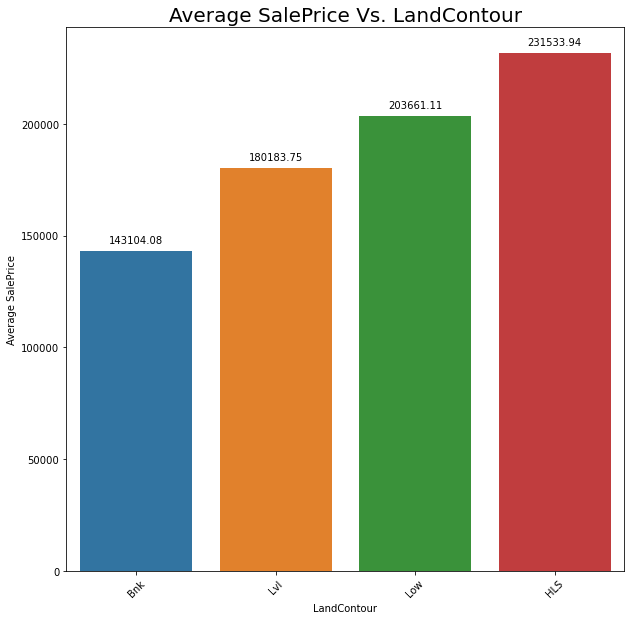

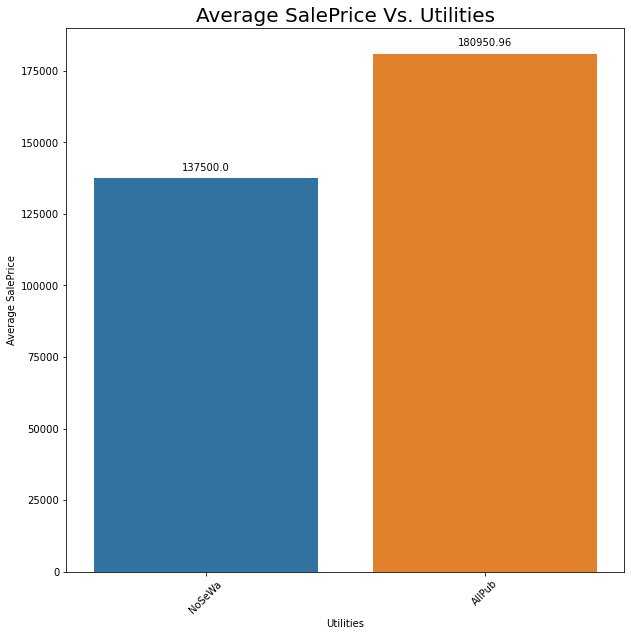

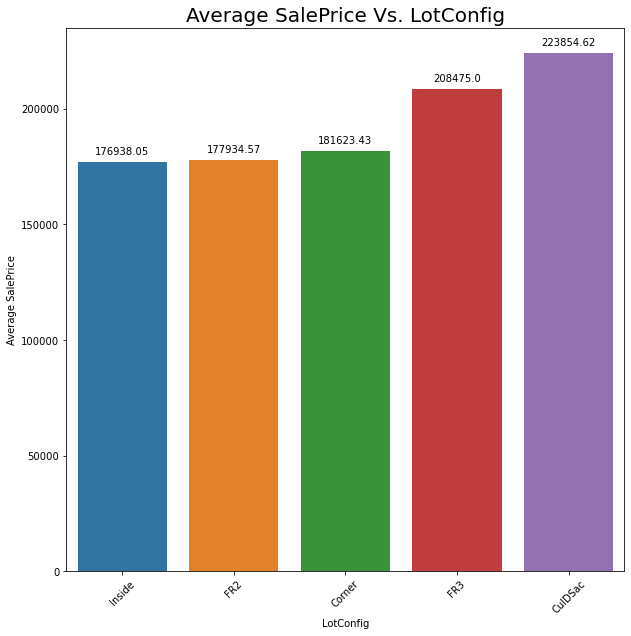

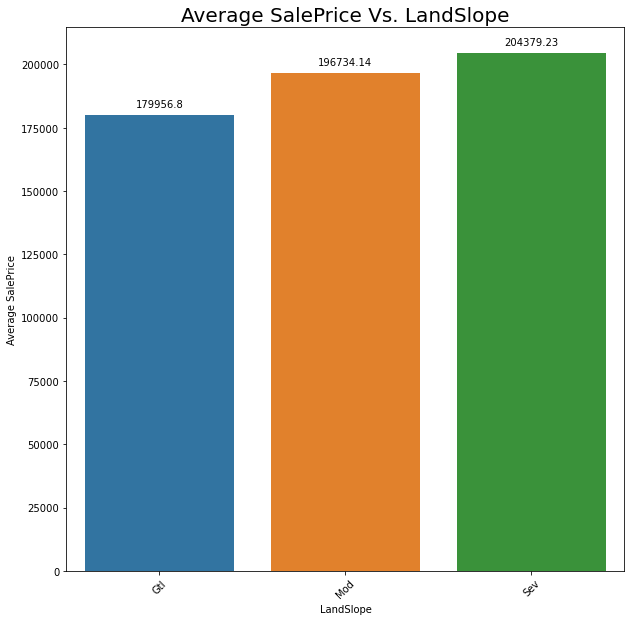

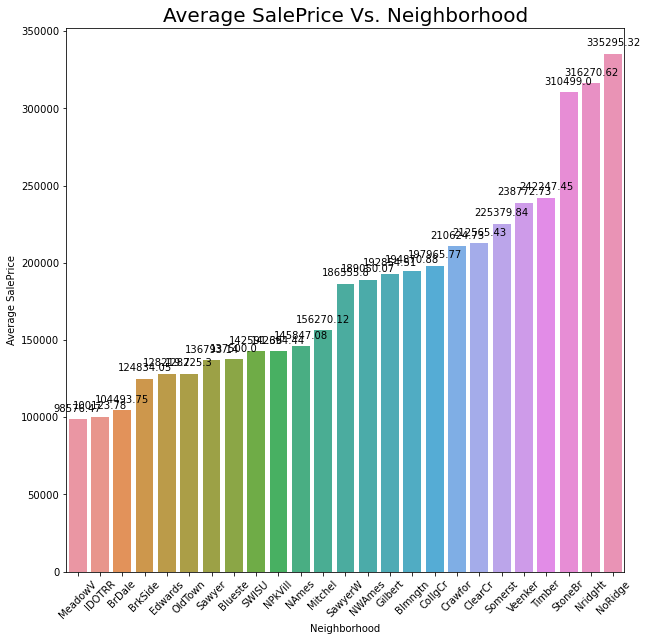

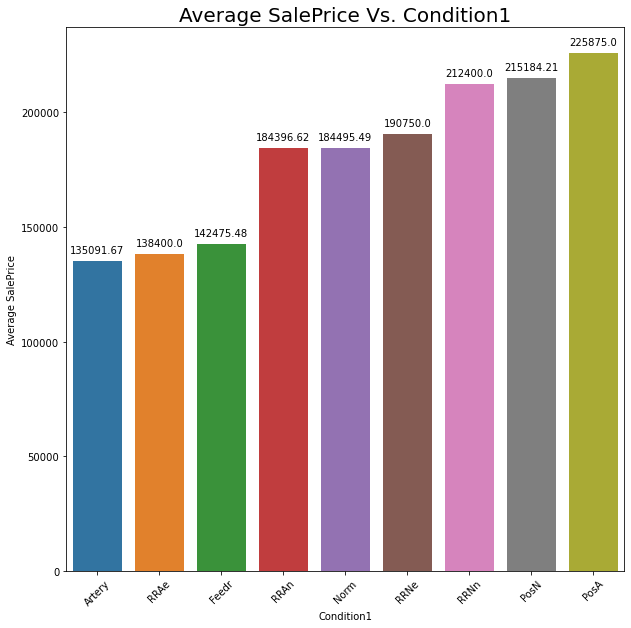

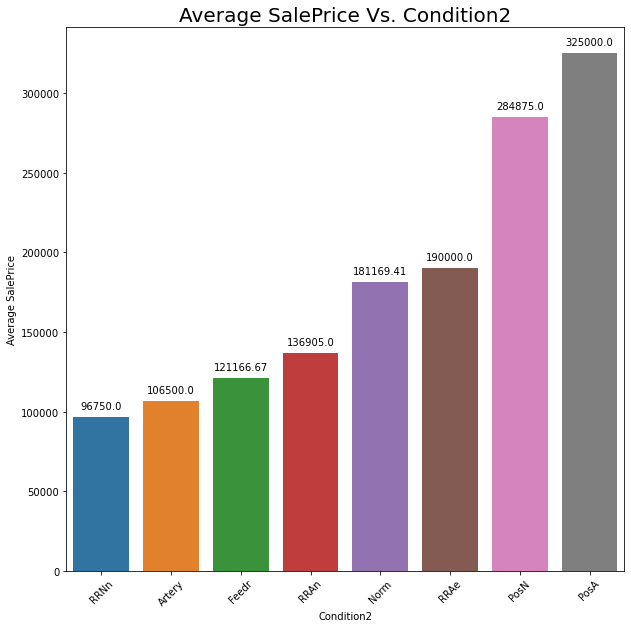

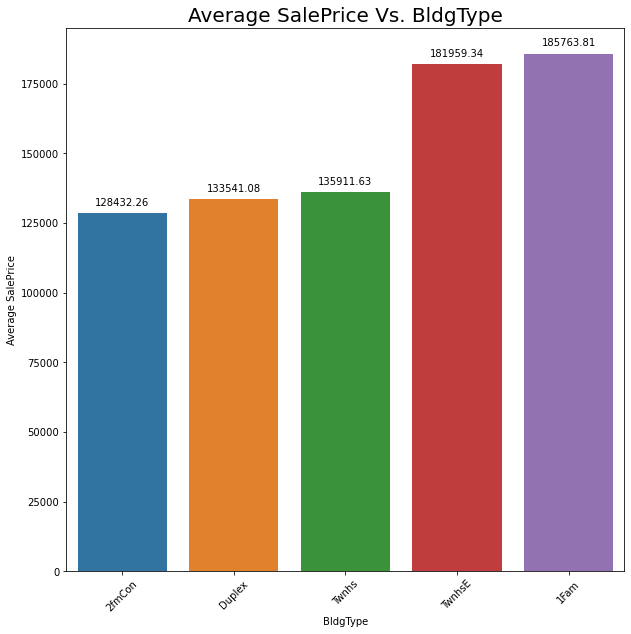

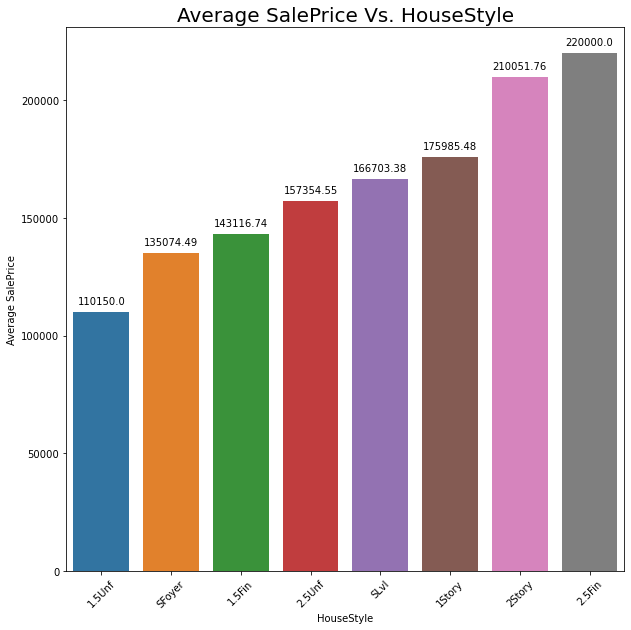

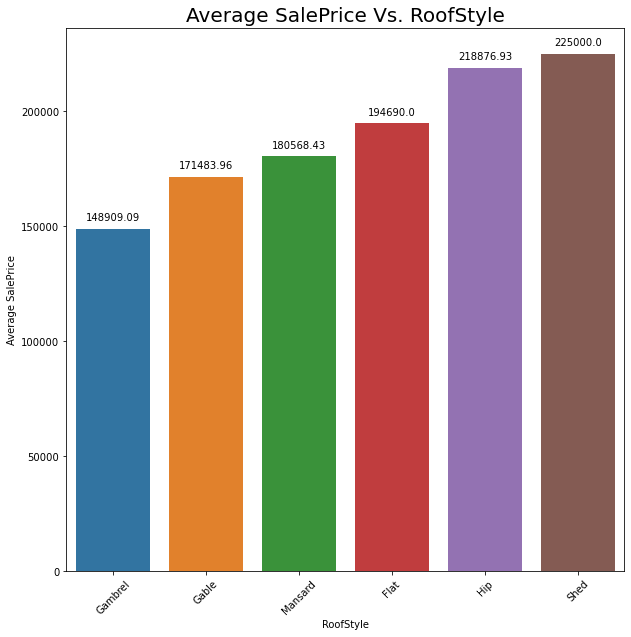

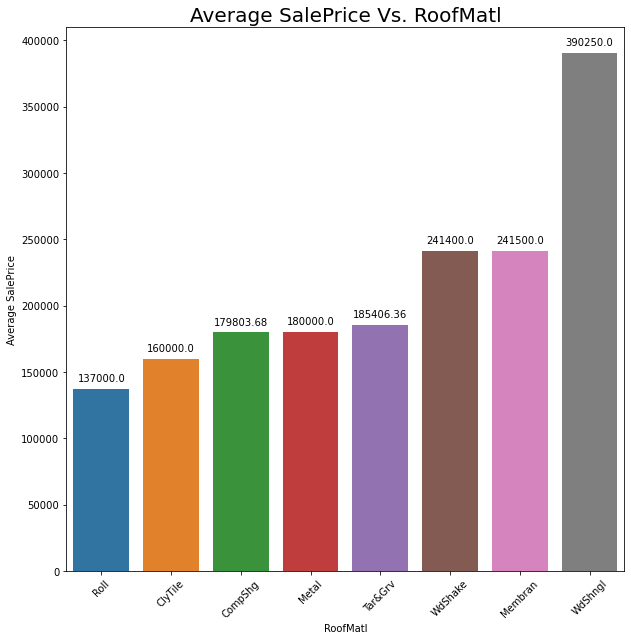

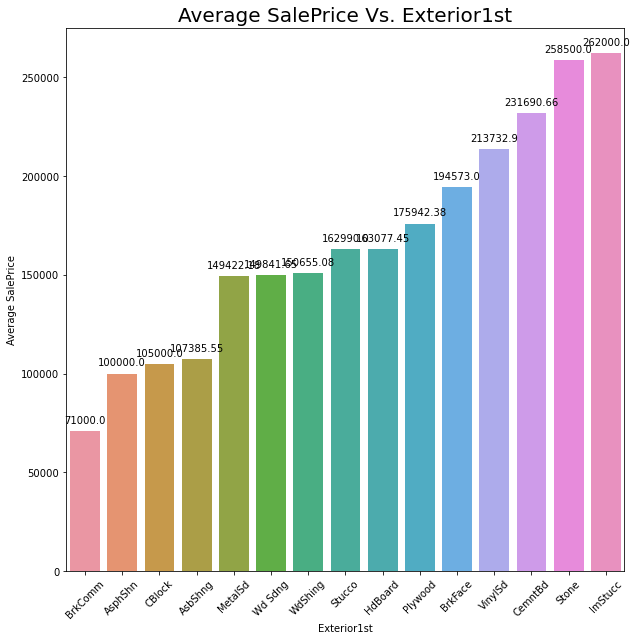

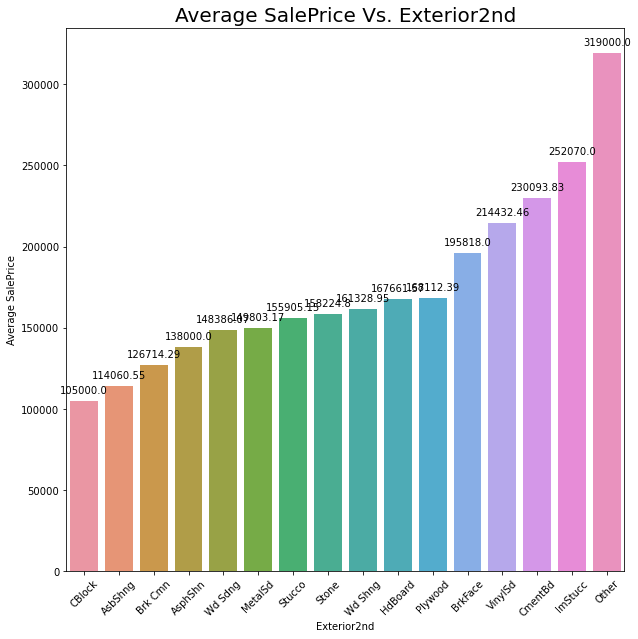

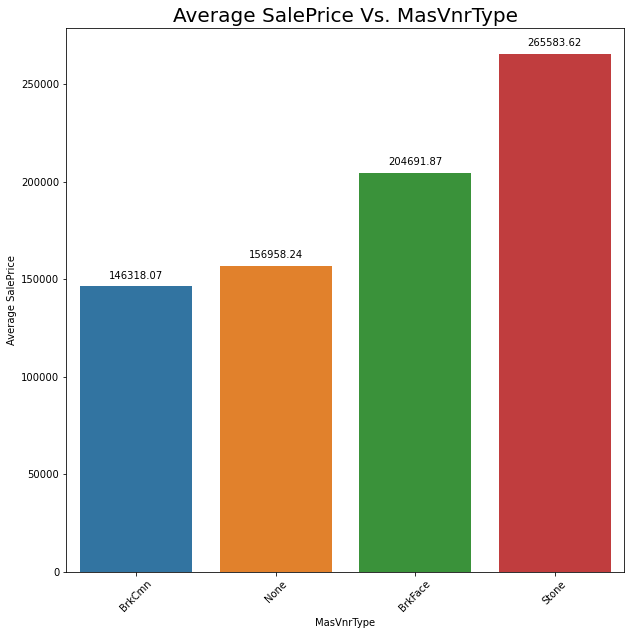

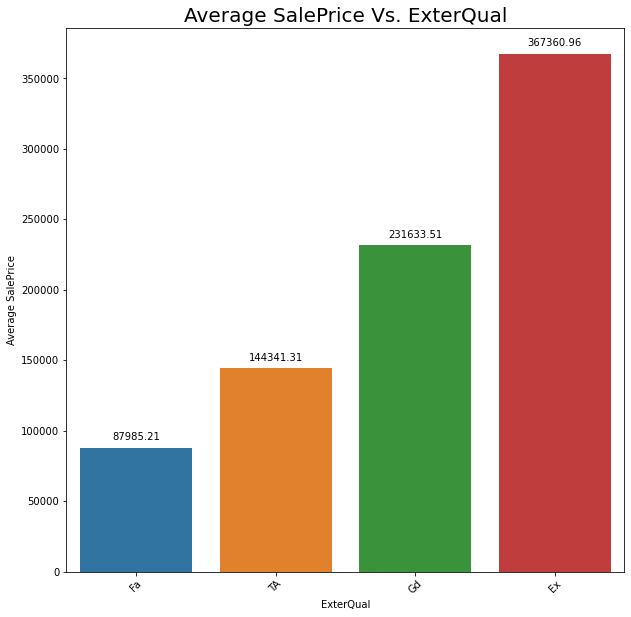

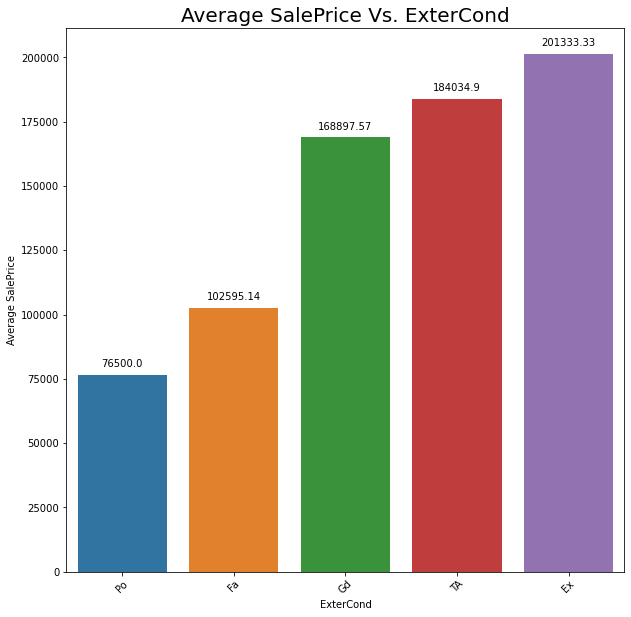

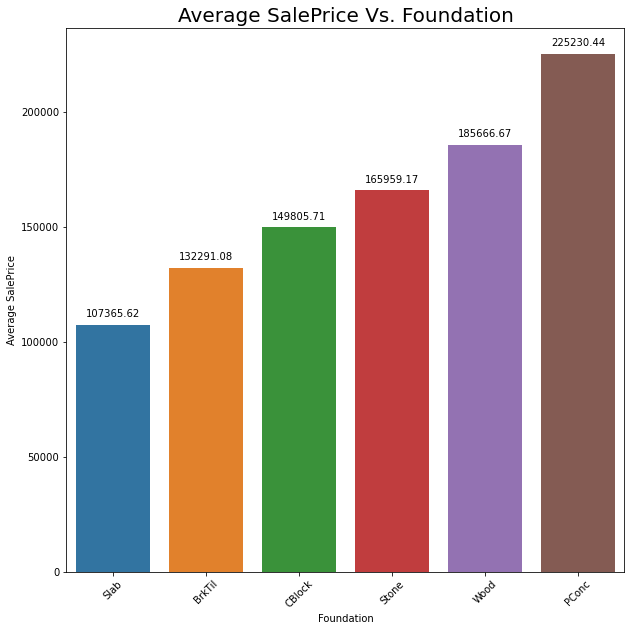

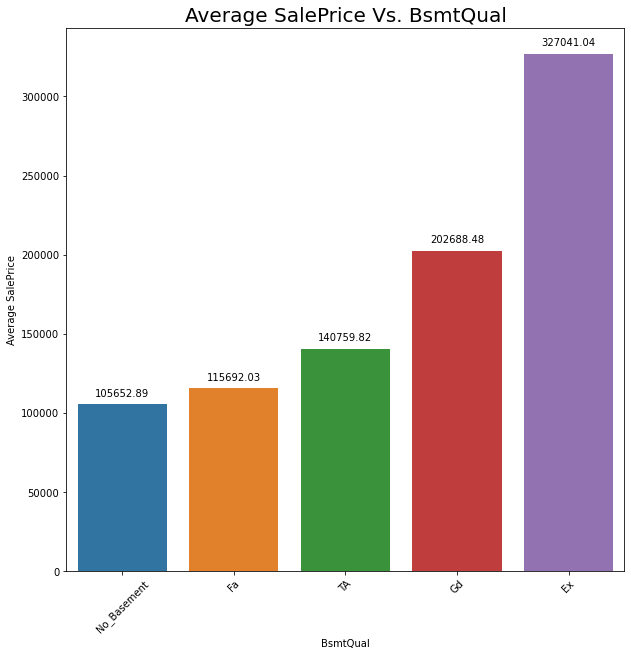

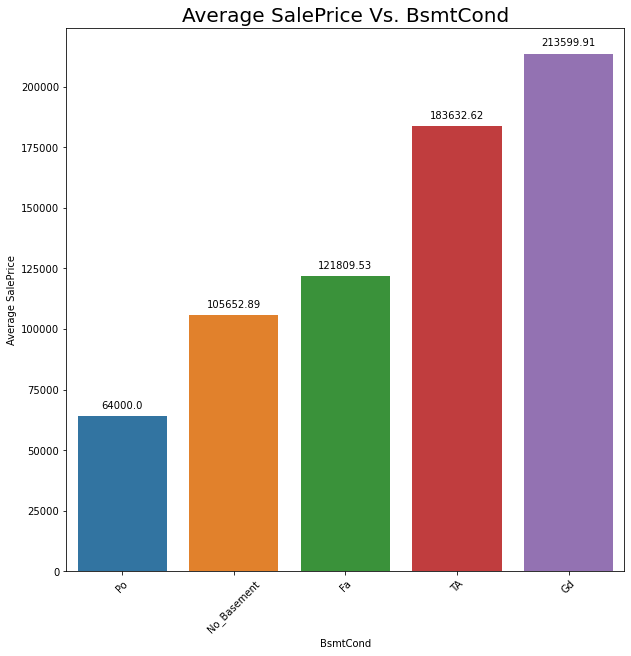

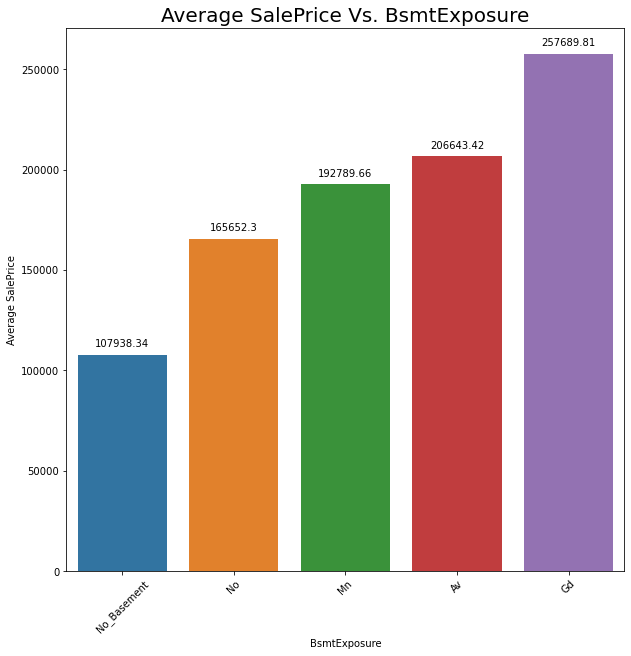

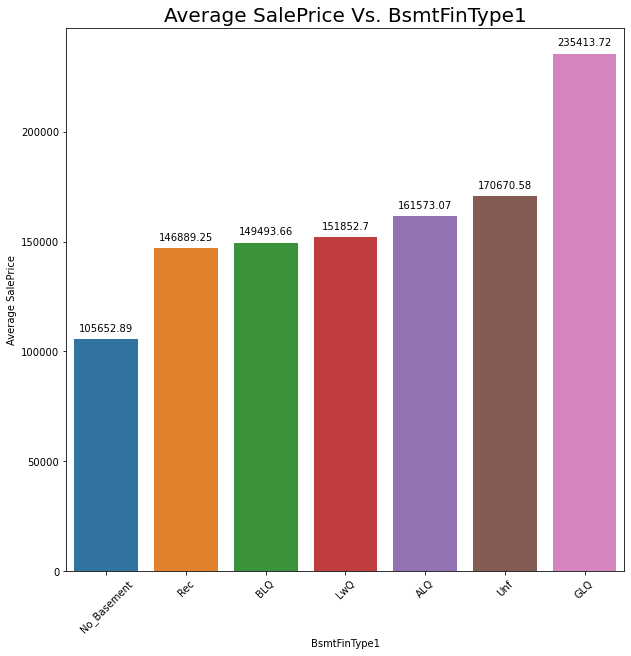

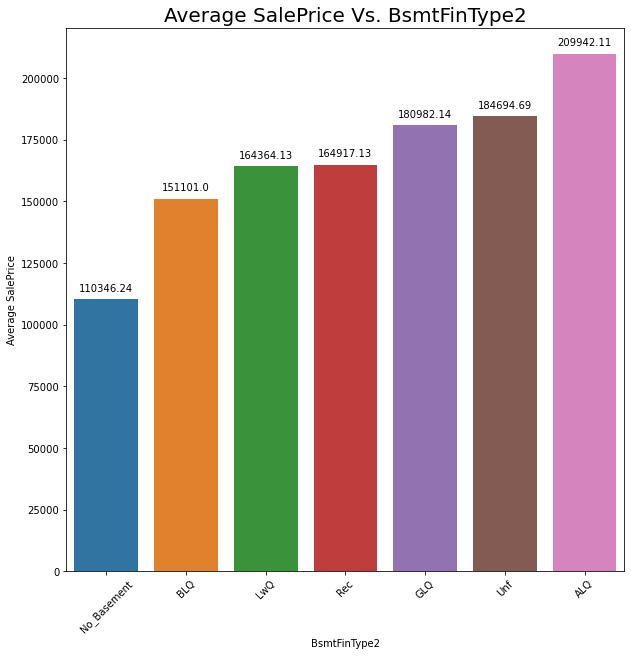

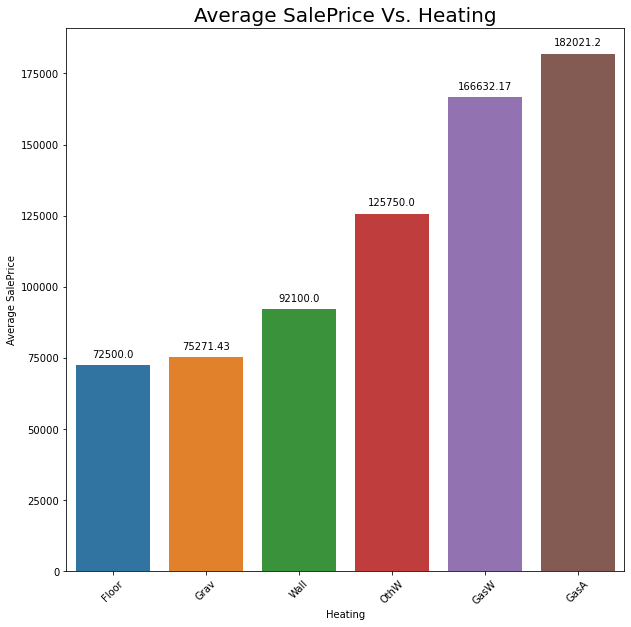

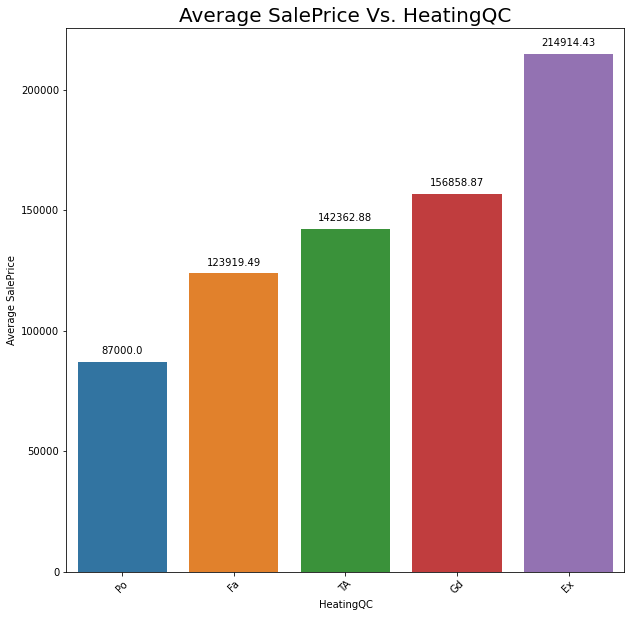

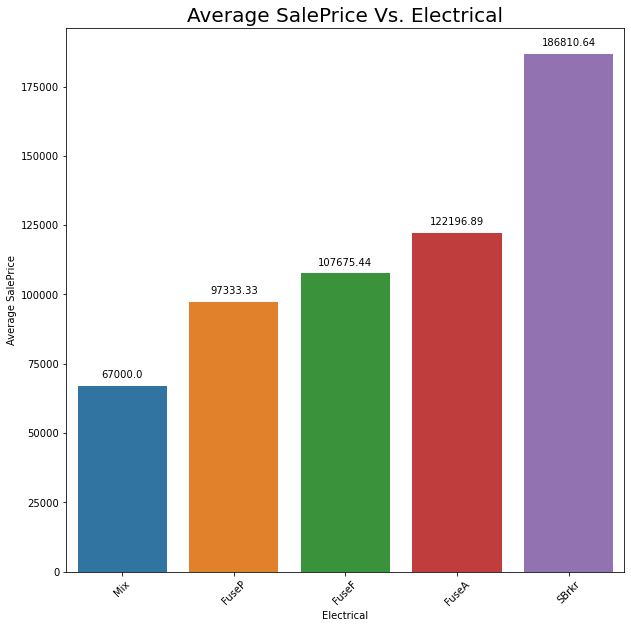

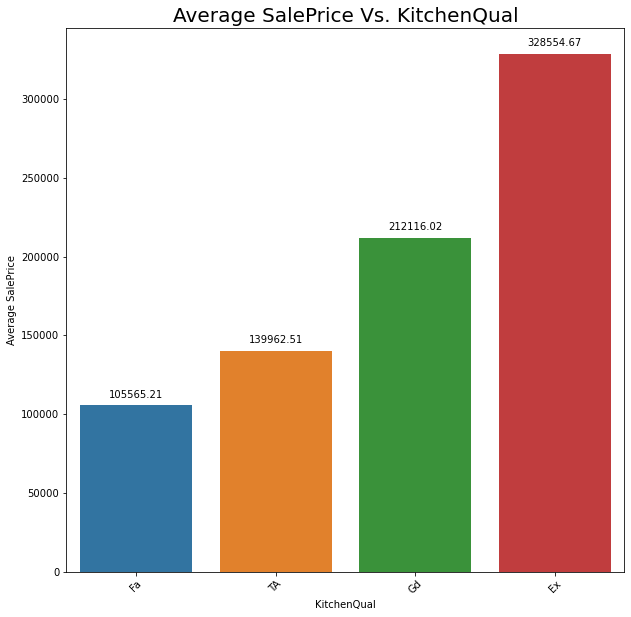

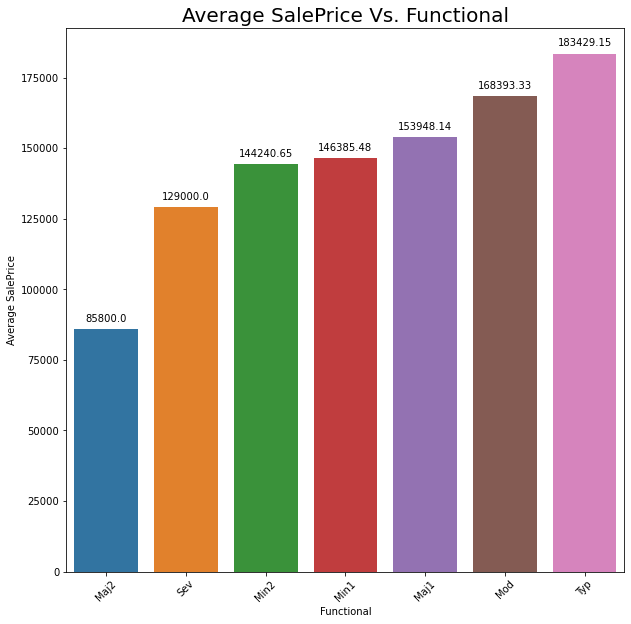

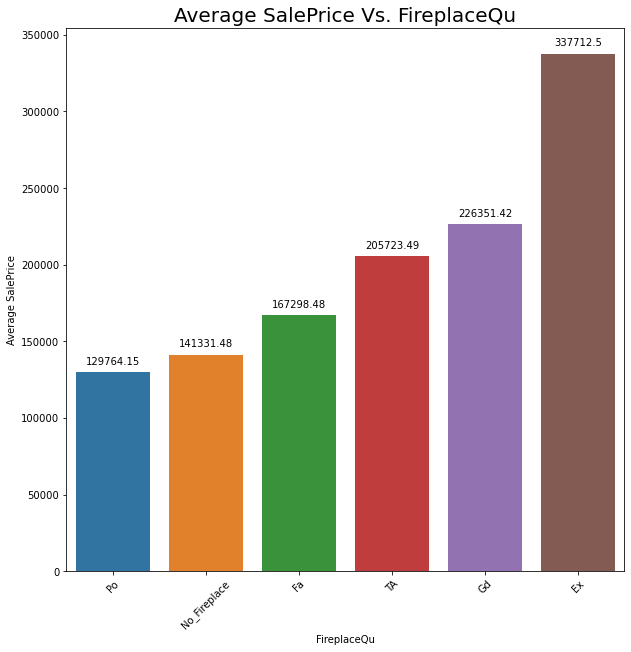

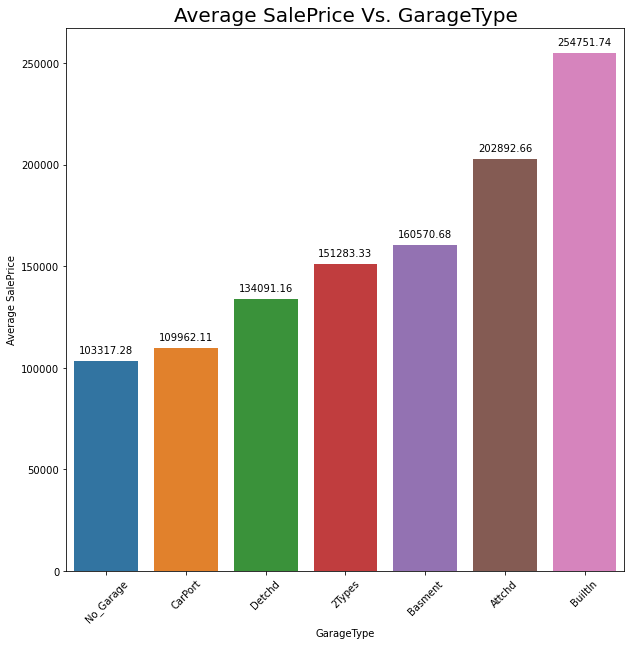

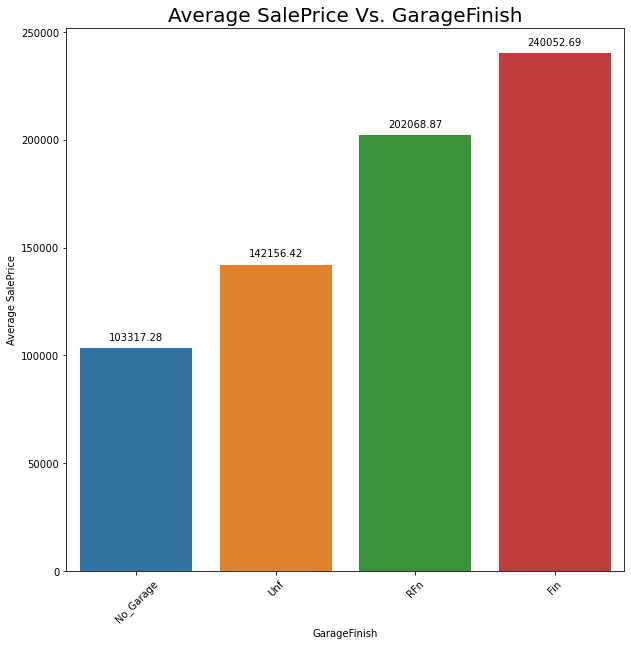

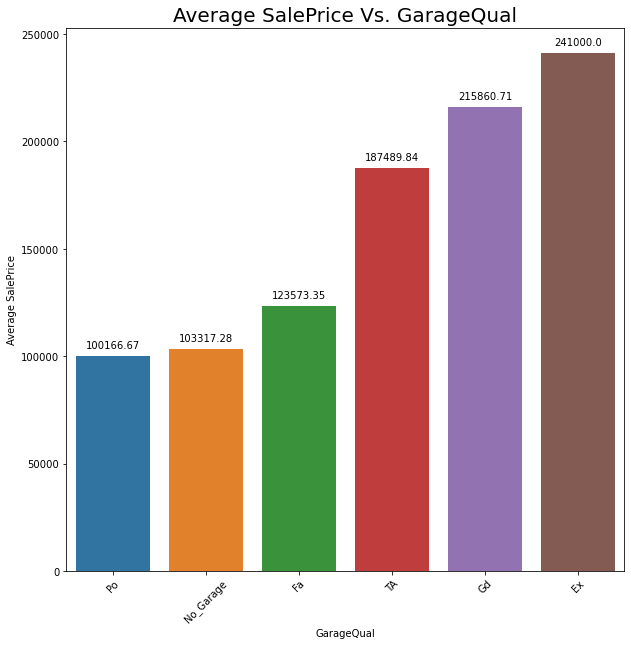

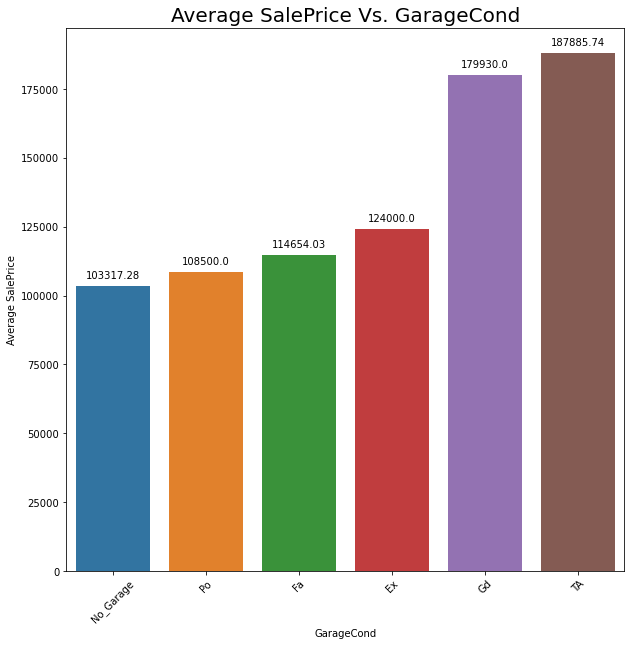

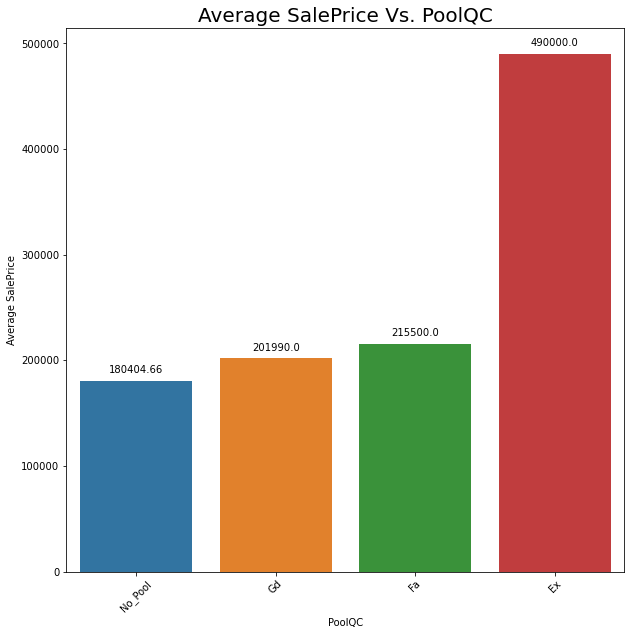

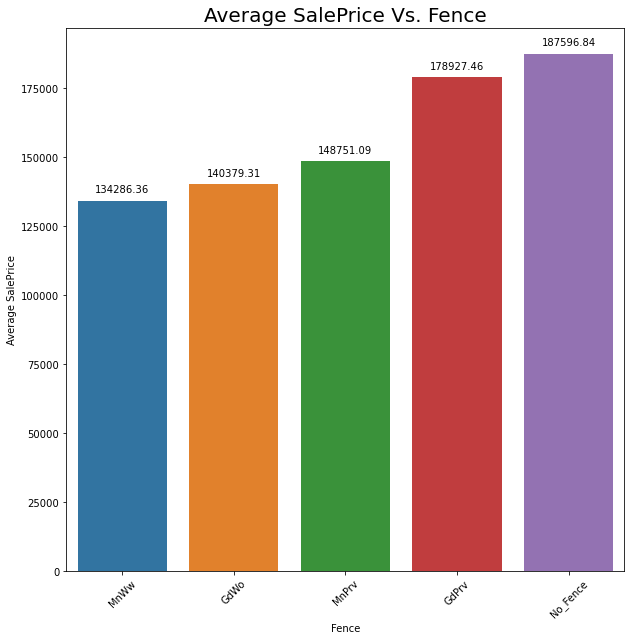

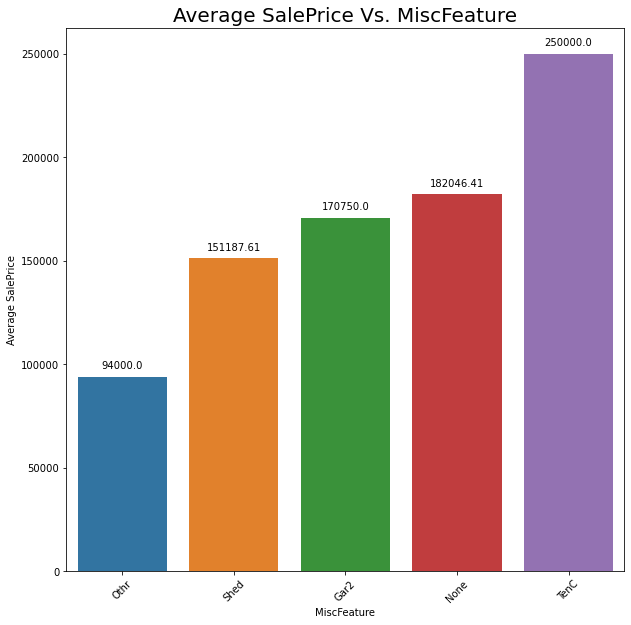

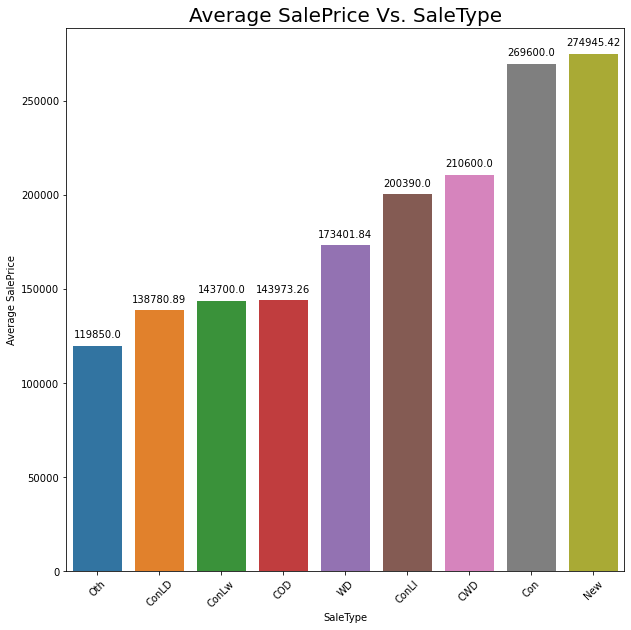

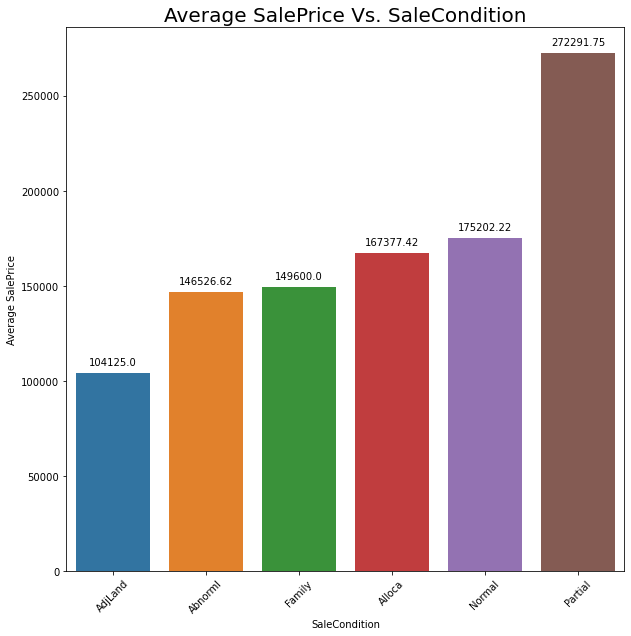

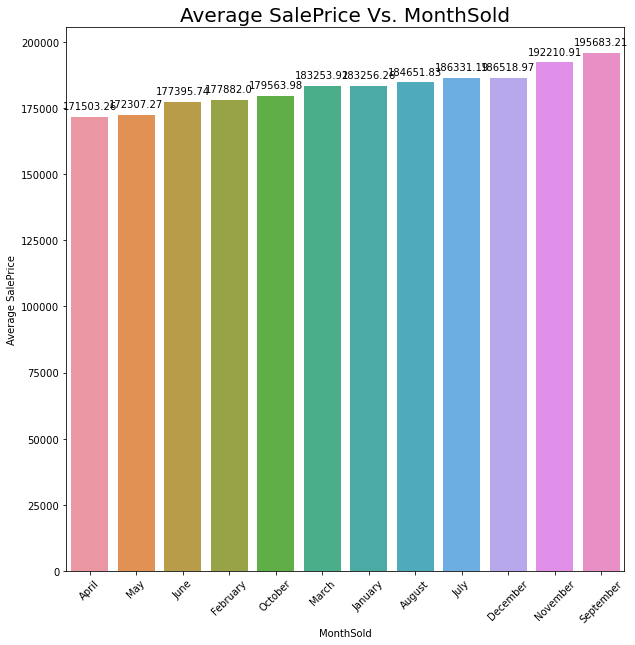

In [173]:
# Checking the distribution of all categorical variables using barplots

# Select categorical variables using the data type
data_cat = data.select_dtypes(include=['object'])

for col in data_cat.columns:
    plt.figure(figsize=(10,10))
    plt.title(col, fontdict={'fontsize': 18})
    col_grouped_df = data.groupby(col)['SalePrice'].mean().sort_values()
    bar_graph_plot_function(data=col_grouped_df, graph_title='Average SalePrice Vs. ' + str(col), x_axis_label=str(col),
                        y_axis_label='Average SalePrice', data_label='horizontal', x_label_rotation=45)

#### All the above bar plots helps us determine how the Average SalePrice is varying for different categories in the features

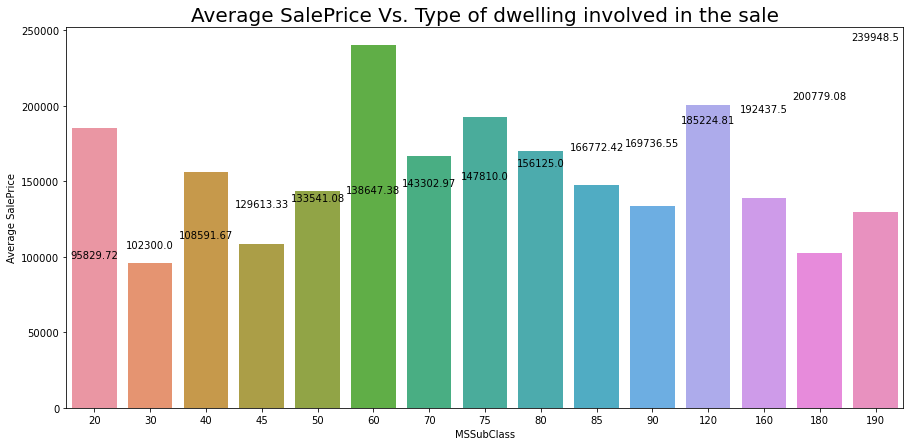

In [174]:
# Checking the distribution of 'MSSubClass' with respect to the average 'SalePrice'

MSSubClasS_dist = data.groupby('MSSubClass')['SalePrice'].mean().sort_values()
plt.figure(figsize=(15,7))
bar_graph_plot_function(data=MSSubClasS_dist, graph_title='Average SalePrice Vs. Type of dwelling involved in the sale', x_axis_label='MSSubClass',
                        y_axis_label='Average SalePrice', data_label='horizontal', x_label_rotation=0)

#### It is observed that the Average SalePrice is more for '2 FAMILY CONVERSION - ALL STYLES AND AGES' denoted by category '190'

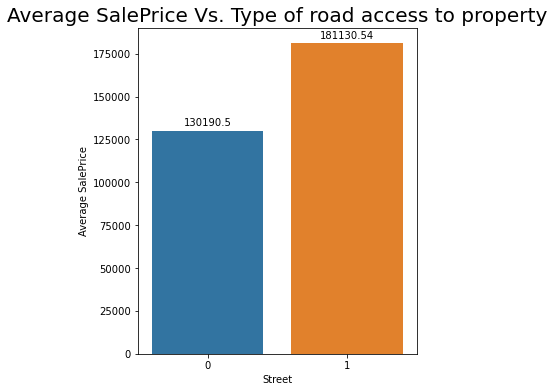

In [175]:
# Checking the distribution of 'Street' with respect to the average 'SalePrice'

Street_dist = data.groupby('Street')['SalePrice'].mean().sort_values()
plt.figure(figsize=(5,6))
bar_graph_plot_function(data=Street_dist, graph_title='Average SalePrice Vs. Type of road access to property', x_axis_label='Street',
                        y_axis_label='Average SalePrice', data_label='horizontal', x_label_rotation=0)

#### It is observed that the Average SalePrice is more for 'Paved', as 1 represents 'Paved' and 0 represents 'Gravel'

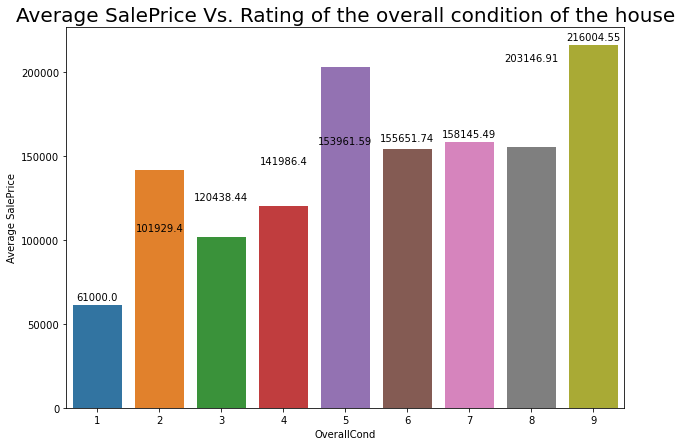

In [176]:
# Checking the distribution of 'OverallCond' with respect to the average 'SalePrice'

OverallCond_dist = data.groupby('OverallCond')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10,7))
bar_graph_plot_function(data=OverallCond_dist, graph_title='Average SalePrice Vs. Rating of the overall condition of the house', x_axis_label='OverallCond',
                        y_axis_label='Average SalePrice', data_label='horizontal', x_label_rotation=0)

#### It is observed that the Average SalePrice is more for properties with Overall Condition 9 which signifies 'Excellent'

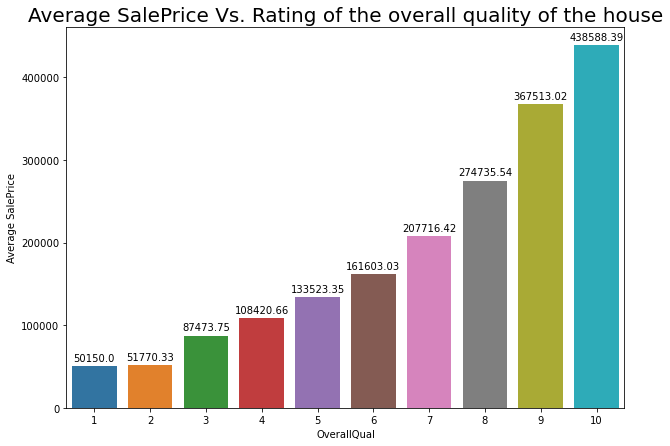

In [177]:
# Checking the distribution of 'OverallQual' with respect to the average 'SalePrice'

OverallQual_dist = data.groupby('OverallQual')['SalePrice'].mean().sort_values()
plt.figure(figsize=(10,7))
bar_graph_plot_function(data=OverallQual_dist, graph_title='Average SalePrice Vs. Rating of the overall quality of the house', x_axis_label='OverallQual',
                        y_axis_label='Average SalePrice', data_label='horizontal', x_label_rotation=0)

#### It is observed that the Average SalePrice is more for properties with Overall Quality 10 which signifies 'Very Excellent'

#### Feature Engineering

In [178]:
# Adding derived fields to data which may be helpful

data["SqFtPerRoom"] = data["GrLivArea"] / (data["TotRmsAbvGrd"] + data["FullBath"] + data["HalfBath"] + data["KitchenAbvGr"])

data['Total_Home_Quality'] = data['OverallQual'] + data['OverallCond']

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data["TotalSF"] = data["1stFlrSF"] + data["2ndFlrSF"]

#calculate building age and age after remodelling add as new coumn
data['Property_Age'] = data['YrSold'] - data['YearBuilt']
data['Remod_Age'] = data['YrSold'] - data['YearRemodAdd']

#calculate building garden area and add as new coumn
data["Garden_Area"] = data["LotArea"] - data["1stFlrSF"]

#calculate garage age
data['Garage_Age'] = data['YrSold'] - data['GarageYrBlt']

data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

#### Check correlation matrix to understand highly correlated variables

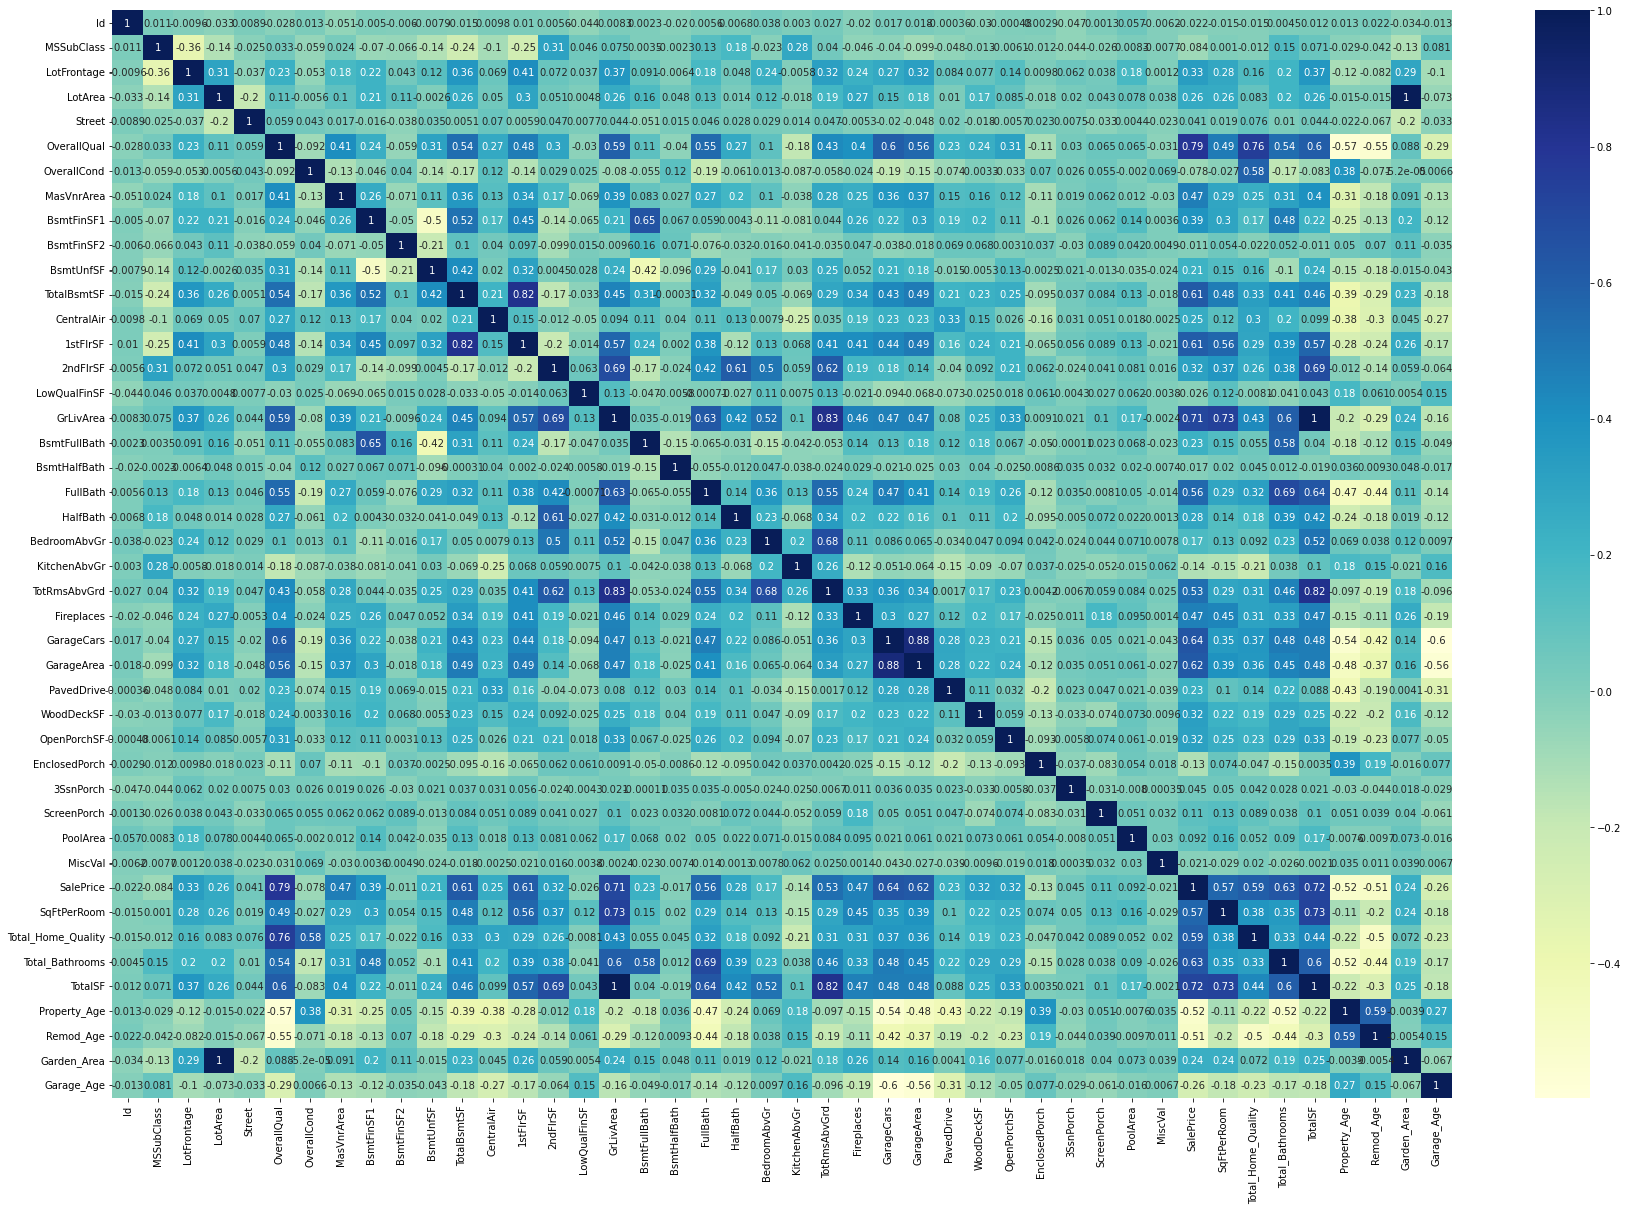

In [179]:
# Checking for highly correlated variables and dropping them from the analysis

cor = data.corr()
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [180]:
# Removing some highly correlated variables from the data

data = data.drop(['GarageCars','TotRmsAbvGrd','GrLivArea','OverallQual','LotArea','Street'], axis = 1)

In [181]:
# Dropping the outliers from the data

data = data.drop(['Id'],axis=1)

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

num_vars=data.select_dtypes(include=['int64','float64']).columns
data=remove_outliers(data,num_vars)

In [182]:
### Transform Categorical columns to dummy columns using one hot encoding

data_categorical = data.select_dtypes(include=['object'])
data_dummies = pd.get_dummies(data_categorical, drop_first=True)

#dropping original categorical columns
data = data.drop(list(data_categorical.columns), axis=1)

### Model Building

In [183]:
#concatenating dummy columns to original dataframe
data_updated = pd.concat([data,data_dummies], axis=1)

#Splitting the dataset into training and testing data in 80,20 ratio
df_train,df_test=train_test_split(data_updated,train_size=0.80, random_state=100)
df_train.shape   

(981, 249)

In [184]:
# Preparing the train and test data

y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

#### We already observed that the dependent column 'SalePrice' is heavily skewed. So, we use log transformation to make it more symmetric or normal

In [185]:
# Scale the numerical values to bring all variables to one scale 

scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=['int64','float64']).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

#### If we chose all the available features and train a Linear Regression model, we will get to know the R-squared and Adjusted R-squared values. We can use those values as a baseline and select the top features from the data, re-train the model using those top features and check if the R-squared and Adjusted R-squared are close to what we obtained in the baseline model (using all existing features)

In [200]:
# First, let us observe the R-squared and Adjusted R-squared with all features
lm=LinearRegression()

rfe = RFE(lm,249)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]

#  Train the model to check the R-squared and Adjusted R-squared values
X_train_new = X_train[col]

X_train_new = sm.add_constant(X_train_new)

lr=sm.OLS(y_train,X_train_new)

# fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     71.68
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:58:12   Log-Likelihood:                 1126.6
No. Observations:                 981   AIC:                            -1791.
Df Residuals:                     750   BIC:                            -661.9
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.6846      0.126     53.261      0.000       6.438       6.931
MSSubClass                  -0.0422      0.019     -2.180      0.030      -0.080      -0.004
LotFrontage                  0.0081      0.005      1.754      0.080      -0.001       0.017
OverallCond                 -0.0125      0.008     -1.613      0.107      -0.028       0.003
MasVnrArea                   0.0051      0.005      0.982      0.327      -0.005       0.015
BsmtFinSF1                   0.0333      0.005      6.768      0.000       0.024       0.043
BsmtFinSF2                   0.0103      0.006      1.646      0.100      -0.002       0.023
BsmtUnfSF                   -0.0018      0.004     -0.413      0.680      -0.011       0.007
TotalBsmtSF                  0.0377      0.007      5.034      0.000       0.023       0.052
CentralAir                   0.0123      0.005      2.586      0.010       0.003       0.022
1stFlrSF                     0.0268      0.009      3.133      0.002       0.010       0.044
2ndFlrSF                     0.0405      0.009      4.614      0.000       0.023       0.058
LowQualFinSF              3.723e-14   1.35e-15     27.598      0.000    3.46e-14    3.99e-14
BsmtFullBath                -0.0022      0.004     -0.532      0.595      -0.010       0.006
BsmtHalfBath                -0.0019      0.003     -0.553      0.580      -0.009       0.005
FullBath                     0.0072      0.005      1.516      0.130      -0.002       0.017
HalfBath                     0.0123      0.005      2.347      0.019       0.002       0.023
BedroomAbvGr                 0.0122      0.005      2.335      0.020       0.002       0.023
KitchenAbvGr             -3.362e-14   1.71e-15    -19.630      0.000    -3.7e-14   -3.03e-14
Fireplaces                   0.0053      0.008      0.680      0.497      -0.010       0.021
GarageArea                   0.0339      0.005      6.296      0.000       0.023       0.044
PavedDrive                  -0.0013      0.004     -0.316      0.752      -0.009       0.007
WoodDeckSF                   0.0150      0.004      4.069      0.000       0.008       0.022
OpenPorchSF                  0.0041      0.004      1.055      0.292      -0.004       0.012
EnclosedPorch                0.0027      0.004      0.663      0.507      -0.005       0.010
3SsnPorch                -3.515e-14   2.02e-15    -17.370      0.000   -3.91e-14   -3.12e-14
ScreenPorch                  0.0108      0.003      3.219      0.001       0.004       0.017
PoolArea                 -1.578e-14   1.77e-15     -8.917      0.000   -1.93e-14   -1.23e-14
MiscVal                   1.578e-14   1.29e-15     12.248      0.000    1.32e-14    1.83e-14
SqFtPerRoom                  0.0112      0.007      1.641      0.101      -0.002       0.025
Total_Home_Qua

#### It is observed that by using all variables in the data, we get an R-Squared of 0.956 and an Adjusted R-Squared of 0.943

#### Though we have obtained a very good R-Squared and Adjusted R-Squared values using all the features, the model is very complex. (Greater the number of features, higher is the model complexity). So, we can choose the top features which are significant in predicting the Saleprice and drop the other features. This can be done using different ways. Reccursive Feature Elimination (RFE) is one such technique.

In [187]:
# Use Recursive Feature Elimination (RFE) to select the top 100 important variables

lm=LinearRegression()
rfe = RFE(lm,100)
rfe=rfe.fit(X_train,y_train)


# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col=X_train.columns[rfe.support_]

# Instead of using all the features for modelling, we replace the training data with only those top 100 columns and train the model
X_train_new = X_train[col]

X_train_new = sm.add_constant(X_train_new)

# Build an Ordinary Least squares model using the top features identified with RFE
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:55   Log-Likelihood:                 857.49
No. Observations:                 981   AIC:                            -1545.
Df Residuals:                     896   BIC:                            -1129.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.859e+11   7.73e+11     -1.276      0.202    -2.5e+12    5.31e+11
MSSubClass                  -0.0496      0.009     -5.661      0.000      -0.067      -0.032
BsmtFinSF1               -8.318e+09   6.52e+09     -1.276      0.202   -2.11e+10    4.48e+09
BsmtFinSF2               -3.196e+09   2.51e+09     -1.276      0.202   -8.11e+09    1.72e+09
BsmtUnfSF                -8.637e+09   6.77e+09     -1.276      0.202   -2.19e+10    4.65e+09
TotalBsmtSF               7.786e+09    6.1e+09      1.276      0.202   -4.19e+09    1.98e+10
1stFlrSF                  2.931e+10    2.3e+10      1.276      0.202   -1.58e+10    7.44e+10
2ndFlrSF                  3.378e+10   2.65e+10      1.276      0.202   -1.82e+10    8.57e+10
LowQualFinSF             -4.232e+09   3.32e+09     -1.276      0.202   -1.07e+10    2.28e+09
BsmtFullBath             -2.749e+10   2.16e+10     -1.276      0.202   -6.98e+10    1.48e+10
BsmtHalfBath             -6.435e+09   5.04e+09     -1.276      0.202   -1.63e+10    3.47e+09
FullBath                 -3.001e+10   2.35e+10     -1.276      0.202   -7.62e+10    1.62e+10
HalfBath                  -1.36e+10   1.07e+10     -1.276      0.202   -3.45e+10    7.33e+09
KitchenAbvGr              5.774e+09   4.53e+09      1.276      0.202   -3.11e+09    1.47e+10
3SsnPorch                -5.911e+09   4.63e+09     -1.276      0.202    -1.5e+10    3.18e+09
PoolArea                 -1.324e+09   1.04e+09     -1.276      0.202   -3.36e+09    7.13e+08
MiscVal                  -3.763e+09   2.95e+09     -1.276      0.202   -9.55e+09    2.03e+09
Total_Home_Quality           0.0774      0.005     16.692      0.000       0.068       0.087
Total_Bathrooms           4.123e+10   3.23e+10      1.276      0.202   -2.22e+10    1.05e+11
TotalSF                  -3.872e+10   3.04e+10     -1.276      0.202   -9.83e+10    2.09e+10
Property_Age                -0.0882      0.007    -12.028      0.000      -0.103      -0.074
MSZoning_FV                  0.4941      0.067      7.326      0.000       0.362       0.626
MSZoning_RH                  0.3413      0.075      4.572      0.000       0.195       0.488
MSZoning_RL                  0.4205      0.065      6.514      0.000       0.294       0.547
MSZoning_RM                  0.4006      0.065      6.125      0.000       0.272       0.529
LotShape_IR2                 0.0874      0.022      3.965      0.000       0.044       0.131
Utilities_NoSeWa            -0.0981      0.109     -0.903      0.367      -0.311       0.115
LotConfig_FR3               -0.1230      0.067     -1.832      0.067      -0.255       0.009
LandSlope_Sev               -0.3616      0.104     -3.474      0.001      -0.566      -0.157
Neighborhood_BrDale         -0.0979      0.041     -2.414      0.016      -0.177      -0.018
Neighborhood_C

#### It is observed that by using just the top 100 significant variables, we got an R-squared value of 0.925 and Adjusted R-Squared value of 0.918 

#### We have reduced the number of features to almost half of the original features but still be able to get good accuracy. We can further make the model simpler by using Regularization techniques like Lasso and Ridge Regression.

#### Choosing the 'alpha' value is significant in Lasso or Ridge Regression because it will determine the coefficients of the features and penalizes them if they are not significant

In [188]:
# Building a Lasso Model

# Chosing the optimum value of 'alpha'
params = {'alpha': [0.00005, 0.005, 0.05, 0.0001, 0.001, 0.01]}
lasso = Lasso()

# Select the right 'alpha' values with least error using GridSearchCV
folds = 5
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'alpha': 0.001}
-0.07512178510984492


#### It is observed that an alpha of 0.001 is optimal for Lasso Regression. So, we train the lasso model using alpha = 0.001 and check the performance by using R-Squared, Adjusted R-Squesred and RMSE values for train and test datasets

In [189]:
#Final lasso model after selecting the optimum 'alpha' value

alpha = 0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print('R-Squared of train data is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print('R-Squared of test data is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1,rfe.ranking_))



R-Squared of train data is:  0.9277319111754188
R-Squared of test data is:  0.8950747374783656
RMSE is:  0.018015188883782528


[('constant', 11.918, 1),
 ('MSSubClass', -0.009, 106),
 ('LotFrontage', 0.011, 90),
 ('OverallCond', -0.019, 114),
 ('MasVnrArea', 0.004, 1),
 ('BsmtFinSF1', 0.03, 1),
 ('BsmtFinSF2', 0.007, 1),
 ('BsmtUnfSF', -0.0, 1),
 ('TotalBsmtSF', 0.036, 142),
 ('CentralAir', 0.009, 1),
 ('1stFlrSF', 0.007, 1),
 ('2ndFlrSF', 0.0, 1),
 ('LowQualFinSF', 0.0, 1),
 ('BsmtFullBath', 0.0, 1),
 ('BsmtHalfBath', -0.0, 1),
 ('FullBath', 0.001, 1),
 ('HalfBath', 0.006, 88),
 ('BedroomAbvGr', 0.01, 1),
 ('KitchenAbvGr', 0.0, 112),
 ('Fireplaces', 0.016, 23),
 ('GarageArea', 0.033, 145),
 ('PavedDrive', -0.001, 98),
 ('WoodDeckSF', 0.013, 118),
 ('OpenPorchSF', 0.001, 122),
 ('EnclosedPorch', 0.003, 1),
 ('3SsnPorch', 0.0, 105),
 ('ScreenPorch', 0.012, 1),
 ('PoolArea', 0.0, 1),
 ('MiscVal', 0.0, 85),
 ('SqFtPerRoom', 0.006, 1),
 ('Total_Home_Quality', 0.096, 1),
 ('Total_Bathrooms', 0.015, 1),
 ('TotalSF', 0.099, 1),
 ('Property_Age', -0.054, 74),
 ('Remod_Age', -0.016, 56),
 ('Garden_Area', 0.014, 140),
 

### Metrics of Lasso Regression with optimum 'alpha' value are:<br> R-Squared of train data is:  0.9277319111754188<br>R-Squared of test data is:  0.8950747374783656<br>RMSE is:  0.018015188883782528

In [190]:
# Building a Ridge Model

# Chosing the optimum value of 'alpha'
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# Select the right 'alpha' values with least error using GridSearchCV
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

Fitting 5 folds for each of 26 candidates, totalling 130 fits
{'alpha': 10.0}
-0.07503897397585768


#### It is observed that an alpha of 10 is optimal for Ridge Regression. So, we train the ridge model using alpha = 10 and check the performance by using R-Squared, Adjusted R-Squesred and RMSE values for train and test datasets

In [191]:
#  Final ridge model

alpha = 10

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print('R-Squared of train data is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print('R-Squared of test data is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1,rfe.ranking_))

R-Squared of train data is:  0.938220265600767
R-Squared of test data is:  0.891339107905921
RMSE is:  0.018656579438641133


[('constant', 11.802, 1),
 ('MSSubClass', -0.015, 106),
 ('LotFrontage', 0.009, 90),
 ('OverallCond', -0.017, 114),
 ('MasVnrArea', 0.0, 1),
 ('BsmtFinSF1', 0.027, 1),
 ('BsmtFinSF2', 0.011, 1),
 ('BsmtUnfSF', -0.001, 1),
 ('TotalBsmtSF', 0.032, 142),
 ('CentralAir', 0.012, 1),
 ('1stFlrSF', 0.031, 1),
 ('2ndFlrSF', 0.03, 1),
 ('LowQualFinSF', 0.0, 1),
 ('BsmtFullBath', -0.001, 1),
 ('BsmtHalfBath', -0.002, 1),
 ('FullBath', 0.011, 1),
 ('HalfBath', 0.014, 88),
 ('BedroomAbvGr', 0.016, 1),
 ('KitchenAbvGr', 0.0, 112),
 ('Fireplaces', 0.012, 23),
 ('GarageArea', 0.03, 145),
 ('PavedDrive', -0.001, 98),
 ('WoodDeckSF', 0.016, 118),
 ('OpenPorchSF', 0.002, 122),
 ('EnclosedPorch', 0.002, 1),
 ('3SsnPorch', 0.0, 105),
 ('ScreenPorch', 0.011, 1),
 ('PoolArea', 0.0, 1),
 ('MiscVal', 0.0, 85),
 ('SqFtPerRoom', 0.013, 1),
 ('Total_Home_Quality', 0.084, 1),
 ('Total_Bathrooms', 0.011, 1),
 ('TotalSF', 0.05, 1),
 ('Property_Age', -0.036, 74),
 ('Remod_Age', -0.017, 56),
 ('Garden_Area', 0.01, 14

### Metrics of Ridge Regression with optimum 'alpha' value:<br>R-Squared of train data is:  0.938220265600767<br>R-Squared of test data is:  0.891339107905921<br>RMSE is:  0.018656579438641133

#### To determine which variables are significant in predicting the SalePrice, we can look at the top coefficients of Lasso and Ridge regression

In [192]:
# First create empty datafame with all the independent variables as indices
data_updated = data_updated.drop(['SalePrice'], axis = 1)
coeff = pd.DataFrame(index=data_updated.columns)
coeff.rows = data_updated.columns

# Add the values of betas or the coefficients to the pandas dataframe
coeff['Ridge'] = ridge.coef_
# View the top 20 coefficients of Ridge regression in descending order
coeff['Ridge'].sort_values(ascending=False)[:20]


Neighborhood_Crawfor     0.103076
Neighborhood_StoneBr     0.096199
Total_Home_Quality       0.083937
Neighborhood_NridgHt     0.065460
Condition2_Norm          0.063231
SaleCondition_Normal     0.060594
Functional_Typ           0.054252
Condition1_Norm          0.051617
TotalSF                  0.050205
Exterior1st_BrkFace      0.049552
SaleType_New             0.039145
MSZoning_RL              0.037059
MSZoning_FV              0.033584
Neighborhood_BrkSide     0.032891
TotalBsmtSF              0.032131
1stFlrSF                 0.031239
2ndFlrSF                 0.030440
GarageArea               0.030349
SaleCondition_Partial    0.030163
Neighborhood_Somerst     0.030078
Name: Ridge, dtype: float64

In [193]:
# Add the values of betas or the coefficients to the pandas dataframe
coeff['Lasso'] = lasso.coef_

# View the top 20 coefficients of Lasso regression in descending order
coeff['Lasso'].sort_values(ascending=False)[:20]

Neighborhood_Crawfor    0.121897
TotalSF                 0.099298
Total_Home_Quality      0.095629
Neighborhood_StoneBr    0.088217
SaleType_New            0.066990
Neighborhood_NridgHt    0.065268
SaleCondition_Normal    0.044772
Functional_Typ          0.040778
Exterior1st_BrkFace     0.038705
Condition1_Norm         0.037008
Neighborhood_BrkSide    0.036110
TotalBsmtSF             0.036082
Neighborhood_Somerst    0.034963
ExterCond_TA            0.033709
Foundation_PConc        0.033217
GarageArea              0.032739
BsmtFinSF1              0.029877
Exterior1st_VinylSd     0.020557
Exterior1st_MetalSd     0.020283
LotConfig_CulDSac       0.019783
Name: Lasso, dtype: float64

## Assignment Part-II ##

#### Question 1<br>What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [195]:
# Building Lasso model by changing alpha to double the optimal value obtained previously

alpha = 0.002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print('R-Squared of train data is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print('R-Squared of test data is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1,rfe.ranking_))



R-Squared of train data is:  0.910637546414836
R-Squared of test data is:  0.8870719643398652
RMSE is:  0.019389228521323763


[('constant', 11.983, 1),
 ('MSSubClass', -0.008, 106),
 ('LotFrontage', 0.011, 90),
 ('OverallCond', -0.021, 114),
 ('MasVnrArea', 0.002, 1),
 ('BsmtFinSF1', 0.027, 1),
 ('BsmtFinSF2', 0.005, 1),
 ('BsmtUnfSF', -0.0, 1),
 ('TotalBsmtSF', 0.043, 142),
 ('CentralAir', 0.009, 1),
 ('1stFlrSF', 0.004, 1),
 ('2ndFlrSF', 0.0, 1),
 ('LowQualFinSF', 0.0, 1),
 ('BsmtFullBath', 0.0, 1),
 ('BsmtHalfBath', -0.0, 1),
 ('FullBath', 0.0, 1),
 ('HalfBath', 0.005, 88),
 ('BedroomAbvGr', 0.008, 1),
 ('KitchenAbvGr', 0.0, 112),
 ('Fireplaces', 0.022, 23),
 ('GarageArea', 0.034, 145),
 ('PavedDrive', -0.0, 98),
 ('WoodDeckSF', 0.011, 118),
 ('OpenPorchSF', 0.0, 122),
 ('EnclosedPorch', 0.002, 1),
 ('3SsnPorch', 0.0, 105),
 ('ScreenPorch', 0.011, 1),
 ('PoolArea', 0.0, 1),
 ('MiscVal', 0.0, 85),
 ('SqFtPerRoom', 0.006, 1),
 ('Total_Home_Quality', 0.102, 1),
 ('Total_Bathrooms', 0.017, 1),
 ('TotalSF', 0.098, 1),
 ('Property_Age', -0.054, 74),
 ('Remod_Age', -0.016, 56),
 ('Garden_Area', 0.013, 140),
 ('Ga

In [196]:
# Building Ridge model by changing alpha to double the optimal value obtained previously

alpha = 20

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print('R-Squared of train data is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print('R-Squared of test data is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1,rfe.ranking_))

R-Squared of train data is:  0.9326591860192553
R-Squared of test data is:  0.8918403634641786
RMSE is:  0.01857051614612188


[('constant', 11.865, 1),
 ('MSSubClass', -0.013, 106),
 ('LotFrontage', 0.01, 90),
 ('OverallCond', -0.016, 114),
 ('MasVnrArea', 0.001, 1),
 ('BsmtFinSF1', 0.028, 1),
 ('BsmtFinSF2', 0.011, 1),
 ('BsmtUnfSF', -0.0, 1),
 ('TotalBsmtSF', 0.033, 142),
 ('CentralAir', 0.012, 1),
 ('1stFlrSF', 0.031, 1),
 ('2ndFlrSF', 0.029, 1),
 ('LowQualFinSF', 0.0, 1),
 ('BsmtFullBath', -0.001, 1),
 ('BsmtHalfBath', -0.001, 1),
 ('FullBath', 0.011, 1),
 ('HalfBath', 0.015, 88),
 ('BedroomAbvGr', 0.016, 1),
 ('KitchenAbvGr', 0.0, 112),
 ('Fireplaces', 0.014, 23),
 ('GarageArea', 0.031, 145),
 ('PavedDrive', -0.001, 98),
 ('WoodDeckSF', 0.015, 118),
 ('OpenPorchSF', 0.002, 122),
 ('EnclosedPorch', 0.003, 1),
 ('3SsnPorch', 0.0, 105),
 ('ScreenPorch', 0.011, 1),
 ('PoolArea', 0.0, 1),
 ('MiscVal', 0.0, 85),
 ('SqFtPerRoom', 0.013, 1),
 ('Total_Home_Quality', 0.085, 1),
 ('Total_Bathrooms', 0.012, 1),
 ('TotalSF', 0.049, 1),
 ('Property_Age', -0.036, 74),
 ('Remod_Age', -0.018, 56),
 ('Garden_Area', 0.01, 

#### It is observed that for Lasso Regression, the R-squared for both training and test data decreased, and RMSE increased by very small value, with double the 'alpha' value

#### It is observed that for Ridge Regression, the R-squared for both training data slightly decreased whereas for test data, there is hardly any change in the value. RMSE also has negligible difference, with double the 'alpha' value

In [197]:
# First create empty datafame with all the independent variables as indices

coeff_new = pd.DataFrame(index=data_updated.columns)
coeff_new.rows = data_updated.columns

# Add the values of betas or the coefficients to the pandas dataframe
coeff_new['Ridge'] = ridge.coef_
# View the top 10 coefficients of Ridge regression in descending order
coeff_new['Ridge'].sort_values(ascending=False)[:10]

Total_Home_Quality      0.085125
Neighborhood_Crawfor    0.080956
Neighborhood_StoneBr    0.067701
Neighborhood_NridgHt    0.052687
SaleCondition_Normal    0.050375
TotalSF                 0.048511
Condition1_Norm         0.046079
Functional_Typ          0.044309
Condition2_Norm         0.044308
Exterior1st_BrkFace     0.038804
Name: Ridge, dtype: float64

In [198]:
# Add the values of betas or the coefficients to the pandas dataframe
coeff_new['Lasso'] = lasso.coef_

# View the top 10 coefficients of Lasso regression in descending order
coeff_new['Lasso'].sort_values(ascending=False)[:10]

Total_Home_Quality      0.101673
TotalSF                 0.097918
Neighborhood_Crawfor    0.077755
TotalBsmtSF             0.042896
Neighborhood_NridgHt    0.041101
SaleType_New            0.034671
GarageArea              0.034442
Condition1_Norm         0.029699
Foundation_PConc        0.029689
BsmtFinSF1              0.027474
Name: Lasso, dtype: float64

#### Question 3<br>After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [206]:
# Create a list of top 5 lasso predictors that are to be removed
top5_lasso_predictors = ['Neighborhood_Crawfor','TotalSF','Total_Home_Quality','Neighborhood_StoneBr','SaleType_New']

In [207]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5_lasso_predictors, axis=1)
X_test_dropped = X_test.drop(top5_lasso_predictors, axis=1)

In [215]:
# Building a Lasso Model
 
params = {'alpha': [0.005, 0.05, 0.001, 0.01]}
lasso = Lasso()

# Select the right 'alpha' values with least error using GridSearchCV
folds = 5
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train_dropped, y_train)

# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'alpha': 0.001}
-0.0832488311943683


In [216]:
#Final lasso model after selecting the optimum 'alpha' value

alpha = 0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_dropped, y_train) 

#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train_dropped)
print('R-Squared of train data is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test_dropped)
print('R-Squared of test data is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1,rfe.ranking_))



R-Squared of train data is:  0.9133019052935265
R-Squared of test data is:  0.8782849648131327
RMSE is:  0.02089791625191825


[('constant', 11.978, 1),
 ('MSSubClass', -0.001, 1),
 ('LotFrontage', 0.011, 1),
 ('OverallCond', 0.048, 1),
 ('MasVnrArea', 0.006, 1),
 ('BsmtFinSF1', 0.027, 1),
 ('BsmtFinSF2', 0.007, 1),
 ('BsmtUnfSF', -0.0, 1),
 ('TotalBsmtSF', 0.047, 1),
 ('CentralAir', 0.014, 1),
 ('1stFlrSF', 0.093, 1),
 ('2ndFlrSF', 0.097, 1),
 ('LowQualFinSF', 0.0, 1),
 ('BsmtFullBath', 0.0, 1),
 ('BsmtHalfBath', -0.001, 1),
 ('FullBath', 0.008, 1),
 ('HalfBath', 0.013, 1),
 ('BedroomAbvGr', 0.011, 1),
 ('KitchenAbvGr', 0.0, 1),
 ('Fireplaces', 0.023, 1),
 ('GarageArea', 0.034, 1),
 ('PavedDrive', -0.0, 1),
 ('WoodDeckSF', 0.012, 1),
 ('OpenPorchSF', 0.004, 1),
 ('EnclosedPorch', 0.003, 1),
 ('3SsnPorch', 0.0, 1),
 ('ScreenPorch', 0.013, 1),
 ('PoolArea', 0.0, 1),
 ('MiscVal', 0.0, 1),
 ('SqFtPerRoom', 0.01, 1),
 ('Total_Home_Quality', 0.011, 1),
 ('Total_Bathrooms', -0.054, 1),
 ('TotalSF', -0.022, 1),
 ('Property_Age', 0.009, 1),
 ('Remod_Age', 0.0, 1),
 ('Garden_Area', 0.0, 1),
 ('Garage_Age', 0.0, 1),
 ('

In [217]:
# First create empty datafame with all the independent variables as indices
data_updated_top5removed = data_updated.drop(top5_lasso_predictors, axis=1)
coeff_new_lasso = pd.DataFrame(index=data_updated_top5removed.columns)
coeff_new_lasso.rows = data_updated_top5removed.columns

# Add the values of betas or the coefficients to the pandas dataframe
coeff_new_lasso['Lasso'] = lasso.coef_

# View the top 10 coefficients of Lasso regression in descending order
coeff_new_lasso['Lasso'].sort_values(ascending=False)[:10]

2ndFlrSF                 0.097458
1stFlrSF                 0.093498
Neighborhood_NridgHt     0.070179
Functional_Typ           0.064534
Neighborhood_Somerst     0.054465
SaleCondition_Partial    0.050084
SaleCondition_Normal     0.047983
OverallCond              0.047605
TotalBsmtSF              0.047495
Condition1_Norm          0.046890
Name: Lasso, dtype: float64